# Table of Contents

[1.Background & Introduction](#1)<br>
[2.Analysis on our Data](#2)<br>
[3. Data Cleaning](#3)<br>
[4. Exploratory Data Analysis](#4)<br>
[5.Futher Analysis and Conclusions](#5)<br>

## Background & Introduction :<a id='1'></a>

### Objective:
    The objective of this report is to be able to analyze the Foster Care System in New York. Displaying the decrease in the graduation rate for the foster care system due to the abuse and neglect in the system, and lack of finacial and emotional support in the Foster Care System. Finding new ways to support and find the areas in which they need the most help in the Foster Care System in New York. 

### What is the Foster Care System ?

The foster care system is a temporary placement for children and youth with families to attain a home in which they can be placed under a safe, stable, nurturing environment. Children are placed with families until the age 18, recieve medical benefits, and social services. 

### High School and the Foster Care System:

Foster care as a whole impacts the involvement and affects educational outcomes, there are lower achievements, amd decrease completion in secondary education. Many have a high school drop out rate, and end up in homeless and juveville system. 

### Why Compare New Jersey  and New York ?
New Jersey is one of the top states in placing foster children with families with a 91% of kids placed in homes annually. The state shifts from an an insitutional based to home care and has adapted advocacy groups and help for parents. On average parents get paid 658/weekly to finance their children. In New York however parents recieve 745/weekly. Based on community district, New York placement on average is 13-48% percent. These states have very similar populations and are crosss- boundary. 

### Hypothesis :
My hypothesis is that there's a large percentage of students in the foster care system in New York that never graduate due to the abuse and neglect that they face in the system. In comparison to New Jersey, New York needs improvement in regards to the way social case workers manage abuse and neglect to decrease the amount of students who are not on track to graudate by senior year. By managing the school budgeting and improving the abuse and neglect in the system we will increase the educational contunity in the system. 

In [1]:
import numpy as np 
import pandas as pd 
import datetime
import pandas_profiling

#### We are going to start working with the in care foster care placement data, to understand how many current children are placed overall in the foster care system in 2020 

#### This dataset is organized by the community district and the total amount of children in the foster care system in 2020.

## Analysis on Our Data <a id='2'></a>

In [2]:
foster_care = pd.read_csv("in care foster care CD 12-31-20.csv", header = None,)
foster_care

0      1
0                             BX03 Morrisania/Crotona    213
1                           BX04 Highbridge/Concourse    186
2                     BX05 Fordham/University Heights    250
3                           BX06 Belmont/East Tremont    172
4                 BX07 Kingsbridge Heights/Bedford Pk    170
..                                                ...    ...
72                                          NYC Total  7,787
73                                                NaN    NaN
74  *Includes children in 24 hour care only. Exclu...    NaN
75                          Prepared  by ACS/DPPM/ORA    NaN
76                                  Data Source: CCRS    NaN

[77 rows x 2 columns]

#### When converting the dataset from excel to csv, it shifts the dataset therefore we need to drop the columns that are unecessary to be able to have our data sliced by our total and community district. 

In [3]:
foster_care.drop([11,12,32,33,47,48,54,55,64,65,70,71,72,73,74,75,76],axis=0,inplace=True)

In [4]:
foster_care

0    1
0               BX03 Morrisania/Crotona  213
1             BX04 Highbridge/Concourse  186
2       BX05 Fordham/University Heights  250
3             BX06 Belmont/East Tremont  172
4   BX07 Kingsbridge Heights/Bedford Pk  170
5             BX08 Riverdale/Fieldstone   54
6            BX09 Parkchester/Soundview  287
7           BX10 Throgs Neck/Co-op City  129
8            BX11 Morris Park/Bronxdale  122
9        BX12 Williamsbridge/Baychester  377
10                         BXUnknown CD   13
13         BK01 Greenpoint/Williamsburg   78
14    BK02 Fort Greene/Brooklyn Heights   80
15              BK03 Bedford Stuyvesant  214
16                        BK04 Bushwick  102
17     BK05 East New York/Starrett City  356
18      BK06 Park Slope/Carroll Gardens   57
19                     BK07 Sunset Park   23
20                   BK08 Crown Heights  123
21    BK09 South Crown Heights/Prospect   60
22         BK10 Bay Ridge/Dyker Heights   31
23                     BK11 Bensonhurst   28
24                    BK12 Borough Park    8
25                    BK13 Coney Island   68
26                BK14 Flatbush/Midwood   73
27                  BK15 Sheepshead Bay   48
28                     BK16 Brownsville  224
29                   BK17 East Flatbush  134
30              BK18 Flatlands/Canarsie  208
31                         BKUnknown CD    7
34              MN01 Financial District    3
35          MN02 Greenwich Village/Soho    1
36       MN03 Lower East Side/Chinatown   88
37                 MN04 Clinton/Chelsea   20
38                         MN05 Midtown    3
39      MN06 Stuyvesant Town/Turtle Bay   98
40                 MN07 Upper West Side   50
41                 MN08 Upper East Side   17
42    MN09 Morningside Height./Hamilton   83
43                  MN10 Central Harlem  214
44                     MN11 East Harlem  173
45       MN12 Washington Heights/Inwood  100
46                         MNUnknown CD   15
49                         QN01 Astoria   58
50              QN02 Woodside/Sunnyside   13
51                 QN03 Jackson Heights   46
52                 QN04 Elmhurst/Corona   26
53               QN05 Ridgewood/Maspeth   53
56         QN08 Hillcrest/Fresh Meadows   56
57            QN09 Ozone Park/Woodhaven   60
58   QN10 South. Ozone Park/Howard Beac   75
59             QN11 Bayside/Little Neck   26
60                  QN12 Jamaica/Hollis  414
61                  QN13 Queens Village  193
62          QN14 Rockaway/Broad Channel  176
63                         QNUnknown CD    6
66          S101 Saint George/Stapleton  286
67         S102 South Beach/Willowbrook   73
68          S103 Tottenville/Great Mils   54
69                          SUnknown CD    1

#### From this we rename the columns to be able to identify the area of placement and how many are in care to be able to manage our dataset. 

In [5]:
foster_care = foster_care.rename(columns={0: "Placement", 1: "In Care"})

In [6]:
foster_care.columns

Index(['Placement', 'In Care'], dtype='object')

In [7]:
foster_care

Placement In Care
0               BX03 Morrisania/Crotona     213
1             BX04 Highbridge/Concourse     186
2       BX05 Fordham/University Heights     250
3             BX06 Belmont/East Tremont     172
4   BX07 Kingsbridge Heights/Bedford Pk     170
5             BX08 Riverdale/Fieldstone      54
6            BX09 Parkchester/Soundview     287
7           BX10 Throgs Neck/Co-op City     129
8            BX11 Morris Park/Bronxdale     122
9        BX12 Williamsbridge/Baychester     377
10                         BXUnknown CD      13
13         BK01 Greenpoint/Williamsburg      78
14    BK02 Fort Greene/Brooklyn Heights      80
15              BK03 Bedford Stuyvesant     214
16                        BK04 Bushwick     102
17     BK05 East New York/Starrett City     356
18      BK06 Park Slope/Carroll Gardens      57
19                     BK07 Sunset Park      23
20                   BK08 Crown Heights     123
21    BK09 South Crown Heights/Prospect      60
22         BK10 Bay Ridge/Dyker Heights      31
23                     BK11 Bensonhurst      28
24                    BK12 Borough Park       8
25                    BK13 Coney Island      68
26                BK14 Flatbush/Midwood      73
27                  BK15 Sheepshead Bay      48
28                     BK16 Brownsville     224
29                   BK17 East Flatbush     134
30              BK18 Flatlands/Canarsie     208
31                         BKUnknown CD       7
34              MN01 Financial District       3
35          MN02 Greenwich Village/Soho       1
36       MN03 Lower East Side/Chinatown      88
37                 MN04 Clinton/Chelsea      20
38                         MN05 Midtown       3
39      MN06 Stuyvesant Town/Turtle Bay      98
40                 MN07 Upper West Side      50
41                 MN08 Upper East Side      17
42    MN09 Morningside Height./Hamilton      83
43                  MN10 Central Harlem     214
44                     MN11 East Harlem     173
45       MN12 Washington Heights/Inwood     100
46                         MNUnknown CD      15
49                         QN01 Astoria      58
50              QN02 Woodside/Sunnyside      13
51                 QN03 Jackson Heights      46
52                 QN04 Elmhurst/Corona      26
53               QN05 Ridgewood/Maspeth      53
56         QN08 Hillcrest/Fresh Meadows      56
57            QN09 Ozone Park/Woodhaven      60
58   QN10 South. Ozone Park/Howard Beac      75
59             QN11 Bayside/Little Neck      26
60                  QN12 Jamaica/Hollis     414
61                  QN13 Queens Village     193
62          QN14 Rockaway/Broad Channel     176
63                         QNUnknown CD       6
66          S101 Saint George/Stapleton     286
67         S102 South Beach/Willowbrook      73
68          S103 Tottenville/Great Mils      54
69                          SUnknown CD       1

#### To section our data based on our borough, we need to be able to split the community district adress and the numnber assigned each community district and assign the total amount per each community district.From this, we can align it to a specific borough, 

In [8]:
a = foster_care.values
a

array([['BX03 Morrisania/Crotona', '213'],
       ['BX04 Highbridge/Concourse', '186'],
       ['BX05 Fordham/University Heights', '250'],
       ['BX06 Belmont/East Tremont', '172'],
       ['BX07 Kingsbridge Heights/Bedford Pk', '170'],
       ['BX08 Riverdale/Fieldstone', '54'],
       ['BX09 Parkchester/Soundview', '287'],
       ['BX10 Throgs Neck/Co-op City', '129'],
       ['BX11 Morris Park/Bronxdale', '122'],
       ['BX12 Williamsbridge/Baychester', '377'],
       ['        BXUnknown CD', '13'],
       ['BK01 Greenpoint/Williamsburg', '78'],
       ['BK02 Fort Greene/Brooklyn Heights', '80'],
       ['BK03 Bedford Stuyvesant', '214'],
       ['BK04 Bushwick', '102'],
       ['BK05 East New York/Starrett City', '356'],
       ['BK06 Park Slope/Carroll Gardens', '57'],
       ['BK07 Sunset Park', '23'],
       ['BK08 Crown Heights', '123'],
       ['BK09 South Crown Heights/Prospect', '60'],
       ['BK10 Bay Ridge/Dyker Heights', '31'],
       ['BK11 Bensonhurst', '28'],
     

#### Therefore we seperate our values assigned with our placement by the comma index, to be able to identify which placements are located in each borough. 

In [9]:
temp = foster_care["Placement"].str.split(" ",1)

In [10]:
temp

0                 [BX03, Morrisania/Crotona]
1               [BX04, Highbridge/Concourse]
2         [BX05, Fordham/University Heights]
3               [BX06, Belmont/East Tremont]
4     [BX07, Kingsbridge Heights/Bedford Pk]
5               [BX08, Riverdale/Fieldstone]
6              [BX09, Parkchester/Soundview]
7             [BX10, Throgs Neck/Co-op City]
8              [BX11, Morris Park/Bronxdale]
9          [BX12, Williamsbridge/Baychester]
10                   [,        BXUnknown CD]
13           [BK01, Greenpoint/Williamsburg]
14      [BK02, Fort Greene/Brooklyn Heights]
15                [BK03, Bedford Stuyvesant]
16                          [BK04, Bushwick]
17       [BK05, East New York/Starrett City]
18        [BK06, Park Slope/Carroll Gardens]
19                       [BK07, Sunset Park]
20                     [BK08, Crown Heights]
21      [BK09, South Crown Heights/Prospect]
22           [BK10, Bay Ridge/Dyker Heights]
23                       [BK11, Bensonhurst]
24        

#### Now we have taken each borough in placement and created a new column named origin id in which it can help us associate the origin id with a borough. 

In [11]:
foster_care[["Origin Id","Placement"]] = foster_care["Placement"].str.split(" ",1, expand=True) 

In [12]:
foster_care

Placement In Care Origin Id
0               Morrisania/Crotona     213      BX03
1             Highbridge/Concourse     186      BX04
2       Fordham/University Heights     250      BX05
3             Belmont/East Tremont     172      BX06
4   Kingsbridge Heights/Bedford Pk     170      BX07
5             Riverdale/Fieldstone      54      BX08
6            Parkchester/Soundview     287      BX09
7           Throgs Neck/Co-op City     129      BX10
8            Morris Park/Bronxdale     122      BX11
9        Williamsbridge/Baychester     377      BX12
10                    BXUnknown CD      13          
13         Greenpoint/Williamsburg      78      BK01
14    Fort Greene/Brooklyn Heights      80      BK02
15              Bedford Stuyvesant     214      BK03
16                        Bushwick     102      BK04
17     East New York/Starrett City     356      BK05
18      Park Slope/Carroll Gardens      57      BK06
19                     Sunset Park      23      BK07
20                   Crown Heights     123      BK08
21    South Crown Heights/Prospect      60      BK09
22         Bay Ridge/Dyker Heights      31      BK10
23                     Bensonhurst      28      BK11
24                    Borough Park       8      BK12
25                    Coney Island      68      BK13
26                Flatbush/Midwood      73      BK14
27                  Sheepshead Bay      48      BK15
28                     Brownsville     224      BK16
29                   East Flatbush     134      BK17
30              Flatlands/Canarsie     208      BK18
31                    BKUnknown CD       7          
34              Financial District       3      MN01
35          Greenwich Village/Soho       1      MN02
36       Lower East Side/Chinatown      88      MN03
37                 Clinton/Chelsea      20      MN04
38                         Midtown       3      MN05
39      Stuyvesant Town/Turtle Bay      98      MN06
40                 Upper West Side      50      MN07
41                 Upper East Side      17      MN08
42    Morningside Height./Hamilton      83      MN09
43                  Central Harlem     214      MN10
44                     East Harlem     173      MN11
45       Washington Heights/Inwood     100      MN12
46                    MNUnknown CD      15          
49                         Astoria      58      QN01
50              Woodside/Sunnyside      13      QN02
51                 Jackson Heights      46      QN03
52                 Elmhurst/Corona      26      QN04
53               Ridgewood/Maspeth      53      QN05
56         Hillcrest/Fresh Meadows      56      QN08
57            Ozone Park/Woodhaven      60      QN09
58   South. Ozone Park/Howard Beac      75      QN10
59             Bayside/Little Neck      26      QN11
60                  Jamaica/Hollis     414      QN12
61                  Queens Village     193      QN13
62          Rockaway/Broad Channel     176      QN14
63                    QNUnknown CD       6          
66          Saint George/Stapleton     286      S101
67         South Beach/Willowbrook      73      S102
68          Tottenville/Great Mils      54      S103
69                     SUnknown CD       1

#### This script allows us to look for the borough id, based on the keywords that identify each borough and return a value that is associated with it. 

In [13]:
def borough(lane):
    if 'BX' in lane:
        return 'Bronx'
    if 'BK' in lane:
        return 'Brooklyn'
    if 'QN' in lane:
        return 'Queens'
    if 'S' in lane:
        return 'Staten Island'
    if 'MN' in lane:
        return 'Manhattan'
    else:
         return 'Not in Lane'
borough('MN04')

'Manhattan'

#### We are going to use the last function to identify the borough's that don't have a key identifier therefore allowing us to have a borough for each place. 

In [14]:
def find_borough(lane,place):
    if lane != '':
        return borough(lane)
    else:
        return borough(place)
find_borough('','BXUnknown CD')

'Bronx'

#### By applying a lambda function, we are able to apply a new row that identifies.the borough that is associated with the origin id. 

In [15]:
foster_care['Borough'] = foster_care.apply(lambda x: find_borough(x['Origin Id'], x['Placement']), axis=1)

In [16]:
foster_care

Placement In Care Origin Id        Borough
0               Morrisania/Crotona     213      BX03          Bronx
1             Highbridge/Concourse     186      BX04          Bronx
2       Fordham/University Heights     250      BX05          Bronx
3             Belmont/East Tremont     172      BX06          Bronx
4   Kingsbridge Heights/Bedford Pk     170      BX07          Bronx
5             Riverdale/Fieldstone      54      BX08          Bronx
6            Parkchester/Soundview     287      BX09          Bronx
7           Throgs Neck/Co-op City     129      BX10          Bronx
8            Morris Park/Bronxdale     122      BX11          Bronx
9        Williamsbridge/Baychester     377      BX12          Bronx
10                    BXUnknown CD      13                    Bronx
13         Greenpoint/Williamsburg      78      BK01       Brooklyn
14    Fort Greene/Brooklyn Heights      80      BK02       Brooklyn
15              Bedford Stuyvesant     214      BK03       Brooklyn
16                        Bushwick     102      BK04       Brooklyn
17     East New York/Starrett City     356      BK05       Brooklyn
18      Park Slope/Carroll Gardens      57      BK06       Brooklyn
19                     Sunset Park      23      BK07       Brooklyn
20                   Crown Heights     123      BK08       Brooklyn
21    South Crown Heights/Prospect      60      BK09       Brooklyn
22         Bay Ridge/Dyker Heights      31      BK10       Brooklyn
23                     Bensonhurst      28      BK11       Brooklyn
24                    Borough Park       8      BK12       Brooklyn
25                    Coney Island      68      BK13       Brooklyn
26                Flatbush/Midwood      73      BK14       Brooklyn
27                  Sheepshead Bay      48      BK15       Brooklyn
28                     Brownsville     224      BK16       Brooklyn
29                   East Flatbush     134      BK17       Brooklyn
30              Flatlands/Canarsie     208      BK18       Brooklyn
31                    BKUnknown CD       7                 Brooklyn
34              Financial District       3      MN01      Manhattan
35          Greenwich Village/Soho       1      MN02      Manhattan
36       Lower East Side/Chinatown      88      MN03      Manhattan
37                 Clinton/Chelsea      20      MN04      Manhattan
38                         Midtown       3      MN05      Manhattan
39      Stuyvesant Town/Turtle Bay      98      MN06      Manhattan
40                 Upper West Side      50      MN07      Manhattan
41                 Upper East Side      17      MN08      Manhattan
42    Morningside Height./Hamilton      83      MN09      Manhattan
43                  Central Harlem     214      MN10      Manhattan
44                     East Harlem     173      MN11      Manhattan
45       Washington Heights/Inwood     100      MN12      Manhattan
46                    MNUnknown CD      15                Manhattan
49                         Astoria      58      QN01         Queens
50              Woodside/Sunnyside      13      QN02         Queens
51                 Jackson Heights      46      QN03         Queens
52                 Elmhurst/Corona      26      QN04         Queens
53               Ridgewood/Maspeth      53      QN05         Queens
56         Hillcrest/Fresh Meadows      56      QN08         Queens
57            Ozone Park/Woodhaven      60      QN09         Queens
58   South. Ozone Park/Howard Beac      75      QN10         Queens
59             Bayside/Little Neck      26      QN11         Queens
60                  Jamaica/Hollis     414      QN12         Queens
61                  Queens Village     193      QN13         Queens
62          Rockaway/Broad Channel     176      QN14         Queens
63                    QNUnknown CD       6                   Queens
66          Saint George/Stapleton     286      S101  Staten Island
67         South Beach/Willowbrook      73      S102  Staten Island
68          T

#### We are now going to be graphing those in care based on the borough they are currently in using bokeh.

In [17]:
from bokeh.plotting import figure,output_file, show
from bokeh.embed import components
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

#### In order to graph this dataframe, we need to be able to convert the values to integers, rather than an object as you cannot graph too categorical data points.

In [18]:
foster_care.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 69
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Placement  60 non-null     object
 1   In Care    60 non-null     object
 2   Origin Id  60 non-null     object
 3   Borough    60 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [19]:
foster_care['In Care'] = foster_care['In Care'].apply(pd.to_numeric) 

In [20]:
foster_care.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 69
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Placement  60 non-null     object
 1   In Care    60 non-null     int64 
 2   Origin Id  60 non-null     object
 3   Borough    60 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB


#### We are going to graph the dataset based on the borough in which the foster kid is in and the sum value so we know how many per borough. 

In [21]:
grouped = foster_care.groupby('Borough')['In Care'].sum()
grouped

Borough
Bronx            1973
Brooklyn         1922
Manhattan         865
Queens           1202
Staten Island     414
Name: In Care, dtype: int64

In [22]:
grouped = foster_care.groupby('Borough')['In Care'].sum()
new_df = pd.DataFrame(list(grouped.items()), columns=['Borough', 'In Care'])
source = ColumnDataSource(data=new_df)
p = figure(y_range=new_df['Borough'], title="Number of Foster Care Kids Per Borough")
borough_names = source.data['Borough'].tolist()
color_map=factor_cmap(field_name='Borough',palette=Spectral6, factors=borough_names)
p.hbar(y='Borough', right='In Care', source = source,height=0.8,color = color_map, legend_label='Total In Care')
p.add_tools(HoverTool())
p.xaxis.axis_label = 'Number in Foster Care'
p.yaxis.axis_label = 'Borough'
show(p) 

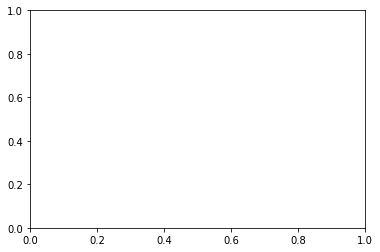

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#### From this plot, we are able to see that Brooklyn and Bronx have the most amount of childrens placed in the foster care system. 

<ipython-input-24-5b234dc72385>:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axes.legend(wedges, labels = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'], title = 'Boroughs', loc = 'center left', bbox_to_anchor = (1,0,0.5,1))


<function bokeh.io.showing.show(obj, browser=None, new='tab', notebook_handle=False, notebook_url='localhost:8888', **kw)>

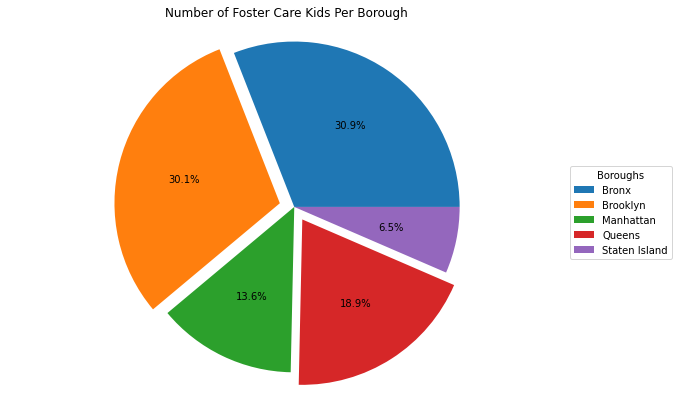

In [24]:
#transforming pie shares
pie_shares = foster_care.groupby('Borough')['In Care'].sum()
#Chart custumization
fig, axes = plt.subplots(figsize=(10,7))
axes.set(title="Number of Foster Care Kids Per Borough")
labels = foster_care['Borough'].values
wedges, texts, autotexts = axes.pie(pie_shares,explode=(0.00,0.09,0.00,0.09,0.00), shadow=False, startangle=0,autopct='%1.1f%%')
axes.legend(wedges, labels = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'], title = 'Boroughs', loc = 'center left', bbox_to_anchor = (1,0,0.5,1))
axes.axis('equal')
show

#### Staten Island and Manhattan, however have the smallest amount of children placed in the foster care system, there can be many factors as to why the geographical standpoint for the number of foster care kids per borough.This can be due to the fact that they don't have as many foster care agencies in these boroughs, or that there is overall more money being distributed in these boroughs for substance and mental abuse. 

##  Data Cleaning : <a id='3'></a>

### This dataset is being used to analyze statics behind High School Graduation Rates of Youth in Foster Care in 2020

In [25]:
graduation = pd.read_csv('High School Graduation Rates of Youth in Foster Care Annual Report 2020.csv')

In [26]:
graduation

Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020  \
0                                                 NaN                       
1                                                 NaN                       
2                                                 NaN                       
3                                               Total                       
4                                          Age Group3                       
5                                       13-15 yrs old                       
6                                       16-18 yrs old                       
7                                       19-20 yrs old                       
8                                              Gender                       
9                                              Female                       
10                                               Male                       
11                                     Race/Ethnicity                       
12                                  African American                        
13                                             Latinx                       
14                                              White                       
15                                              Asian                       
16                                      Other/Unknown                       
17                                                NaN                       
18                                                NaN                       
19  Foster Care Youth Enrolled in High School at t...                       
20                                                NaN                       
21                                                NaN                       
22                                                NaN                       
23                                              Total                       
24                                         Age Group                        
25                                        <14 yrs old                       
26                                      14-15 yrs old                       
27                                      16-18 yrs old                       
28                                      19-20 yrs old                       
29                                             Gender                       
30                                             Female                       
31                                               Male                       
32                                     Race/Ethnicity                       
33                                  African American                        
34                                             Latinx                       
35                                              White                       
36                                              Asian                       
37                                      Other/Unknown                       
38                                                NaN                       
39  1 Includes youth in 24 hour care status, on tr...                       
40  2 Enrollment data consider all students who en...                       
41       3Age is calculated as of December 31, 2019.                        
42  4  "On track" status is measured by cohort and...                       
43  *The number of youth in cells with less than s...                       

                      Unnamed: 1            Unnamed: 2  Unnamed: 3  
0                            NaN                   NaN         NaN  
1   Enrolled in \nPublic Schools                   NaN         NaN  
2                         Total            High School         NaN  
3                          7,607                 2,308         NaN  
4                            NaN                   NaN         NaN  
5                          1,234                   676         NaN  
6                          1,420                 1,395

#### We are going to drop the columns that are unecessary due to when shifting from excel to csv it shifts our data, therefore creatimg null values in our dataset.

In [27]:
graduation.drop([0,1,2,3,4,8,11,17,18,19,20,21,22,23,24,29,32,38,39,40,41,42,43],axis=0,inplace=True)

In [28]:
graduation

Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020  \
5                                       13-15 yrs old                       
6                                       16-18 yrs old                       
7                                       19-20 yrs old                       
9                                              Female                       
10                                               Male                       
12                                  African American                        
13                                             Latinx                       
14                                              White                       
15                                              Asian                       
16                                      Other/Unknown                       
25                                        <14 yrs old                       
26                                      14-15 yrs old                       
27                                      16-18 yrs old                       
28                                      19-20 yrs old                       
30                                             Female                       
31                                               Male                       
33                                  African American                        
34                                             Latinx                       
35                                              White                       
36                                              Asian                       
37                                      Other/Unknown                       

   Unnamed: 1 Unnamed: 2 Unnamed: 3  
5       1,234        676        NaN  
6       1,420      1,395        NaN  
7         245        237        NaN  
9       3,839      1,290        NaN  
10      3,768      1,018        NaN  
12      3,915      1,223        NaN  
13      2,639        832        NaN  
14        498        123        NaN  
15        193         78        NaN  
16        362         52        NaN  
25          *          *          *  
26        577        441          *  
27      1,258        658        106  
28        203          *          *  
30      1,163        678         73  
31        878        444         54  
33      1,082        575         61  
34        752        409         52  
35         98         62         10  
36         68         52          *  
37         41         24          *

### By using iloc we can extract statics that allow us to comprehend ages, race, etc behind those who are graduating high school.

In [29]:
ages = graduation.iloc[:3]
ages

Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020  \
5                                      13-15 yrs old                       
6                                      16-18 yrs old                       
7                                      19-20 yrs old                       

  Unnamed: 1 Unnamed: 2 Unnamed: 3  
5      1,234        676        NaN  
6      1,420      1,395        NaN  
7        245        237        NaN

#### We are renaming our columns to be able to understand those who have enrolled in high school out of the total that are currently placed in the system by these ages 

In [30]:
ages.rename(columns={'Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020':'Ages', 'Unnamed: 1': 'Total','Unnamed: 2':'Enrolled in High School'})

Ages  Total Enrolled in High School Unnamed: 3
5  13-15 yrs old  1,234                     676        NaN
6  16-18 yrs old  1,420                   1,395        NaN
7  19-20 yrs old    245                     237        NaN

#### Dropping the null value

In [31]:
ages = ages.drop(columns=['Unnamed: 3'])

In [32]:
ages

Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020  \
5                                      13-15 yrs old                       
6                                      16-18 yrs old                       
7                                      19-20 yrs old                       

  Unnamed: 1 Unnamed: 2  
5      1,234        676  
6      1,420      1,395  
7        245        237

#### Now we are going to identify those enrolled in high school based on the gender. 

In [33]:
gender = graduation.iloc[3:5]
gender

Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020  \
9                                              Female                       
10                                               Male                       

   Unnamed: 1 Unnamed: 2 Unnamed: 3  
9       3,839      1,290        NaN  
10      3,768      1,018        NaN

#### Similar to our last two dataframes, we have to rename our columns so we can be able to data clean it. 

In [34]:
gender = gender.rename(columns={'Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020':'Gender', 'Unnamed: 1': 'Total','Unnamed: 2':'Enrolled in High School'})

In [35]:
gender

Gender  Total Enrolled in High School Unnamed: 3
9   Female  3,839                   1,290        NaN
10    Male  3,768                   1,018        NaN

#### We drop null values in this dataframe. 

In [36]:
gender = gender.drop(columns=['Unnamed: 3'])

In [37]:
gender

Gender  Total Enrolled in High School
9   Female  3,839                   1,290
10    Male  3,768                   1,018

#### We represent the total and those enrolled in high school using a bar chart. 

In [38]:
#this can be represented in a bar chart 
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure

output_file("genderinhighschool.html")

Gender = ['Female','Male']
Enrollment = ['Total', 'In High School']

data = {'Gender' : Gender,
        'Total'   : [3839,3768],
        'In High School' : [1290,1018]
       }
       

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (Genders, Enrollments) for Genders in Gender for Enrollments in Enrollment]
counts = sum(zip(data['Total'], data['In High School']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=350, title="Enrollment by Gender",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None
show(p)

#### From this barchart, we are able to see that less tnan half of each gender is enrolled in high school, there is only 33% females enrolled in high school and for males there is only 27% that are enrolled in high school. 

In [39]:
race = graduation.iloc[5:10]
race

Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020  \
12                                  African American                        
13                                             Latinx                       
14                                              White                       
15                                              Asian                       
16                                      Other/Unknown                       

   Unnamed: 1 Unnamed: 2 Unnamed: 3  
12      3,915      1,223        NaN  
13      2,639        832        NaN  
14        498        123        NaN  
15        193         78        NaN  
16        362         52        NaN

#### Now we are repeating the steps, that we have done so in the last two dataframes. 

In [40]:
race = race.rename(columns={'Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020':'Race', 'Unnamed: 1': 'Total','Unnamed: 2':'Enrolled in High School'})

In [41]:
race

Race  Total Enrolled in High School Unnamed: 3
12  African American   3,915                   1,223        NaN
13             Latinx  2,639                     832        NaN
14              White    498                     123        NaN
15              Asian    193                      78        NaN
16      Other/Unknown    362                      52        NaN

In [42]:
race = race.drop(columns=['Unnamed: 3'])
race

Race  Total Enrolled in High School
12  African American   3,915                   1,223
13             Latinx  2,639                     832
14              White    498                     123
15              Asian    193                      78
16      Other/Unknown    362                      52

In [43]:
from bokeh.io import output_file, show
from bokeh.plotting import figure

output_file("race_in_highschool.html")

Race = ['African American', 'Latinx', 'White', 'Asian', 'Other/Unknown']
Enrollment = ['Total', 'In High School']
colors = ["#c9d9d3", "#718dbf"]

data = {'Race' : Race,
        'Total': [3915,2639,498,193,362],
        'In High School' : [1223,832,123,78,52],
        }

p = figure(x_range=Race, plot_height=600, title="Race Per Enrollement Year",
           toolbar_location=None, tools="hover", tooltips="$name @Race: @$name")

p.vbar_stack(Enrollment, x='Race', width=0.9, color=colors, source=data,
             legend_label=Enrollment)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

#### From this bar chart, we are able to see that there is a small percentage of each race that is actually placed in high school, and the largest races that are located in the system are African American and Latino. 

In [44]:
graduation_track = graduation.iloc[10:14]
graduation_track

Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020  \
25                                        <14 yrs old                       
26                                      14-15 yrs old                       
27                                      16-18 yrs old                       
28                                      19-20 yrs old                       

   Unnamed: 1 Unnamed: 2 Unnamed: 3  
25          *          *          *  
26        577        441          *  
27      1,258        658        106  
28        203          *          *

#### From this, we are going to be able to determine how many per age are currently in the system, are on track to graduate within the next 4 years, and how many are in the pathway to graduate within the next 5 years.

In [45]:
graduation_track = graduation_track.rename(columns={'Foster Care Youth1 Enrolled2 in NYC Public Schools During SY 2019-2020':'Age Range',  'Unnamed: 1': 'Total','Unnamed: 2':'4 Years','Unnamed: 3':'5 Years'})

In [46]:
graduation_track

Age Range  Total 4 Years 5 Years
25    <14 yrs old      *       *       *
26  14-15 yrs old    577     441       *
27  16-18 yrs old  1,258     658     106
28  19-20 yrs old    203       *       *

#### No one within the age range less than 14 is in high school, from this we can see that many of these placement that have an empty value are represented with an asterik, however they should be represented with a value of 0 to be able to graph.

In [47]:
graduation_track = graduation_track.replace(['*'], 0)
graduation_track

Age Range  Total 4 Years 5 Years
25    <14 yrs old      0       0       0
26  14-15 yrs old    577     441       0
27  16-18 yrs old  1,258     658     106
28  19-20 yrs old    203       0       0

#### One of the errors we have in our dataframe, is the commas that seperate the integers in our dataset as they have a comma seperating the values that are largen than 100 so we are going to replace every value that representrd with a comma with an empty value. We are going to equal the temporary new value to the dataframe and add the his to the dataframe everytime. 

In [48]:
count = 0 
for row in graduation_track['Total']:
    if  type(row) == str and ',' in row:
        print(row)
        temp = row.replace(',', '')
        print(temp)
        graduation_track['Total'].iloc[count] = int(temp)
        graduation_track
#         print(graduation_track)
    count += 1
print(graduation_track)

1,258
1258
        Age Range Total 4 Years 5 Years
25    <14 yrs old     0       0       0
26  14-15 yrs old   577     441       0
27  16-18 yrs old  1258     658     106
28  19-20 yrs old   203       0       0


#### From this we need to convert the values in the dataframe to numeric, as we want to be able to graph these values in our dataset. 

In [49]:
graduation_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 25 to 28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age Range  4 non-null      object
 1   Total      4 non-null      object
 2   4 Years    4 non-null      object
 3   5 Years    4 non-null      object
dtypes: object(4)
memory usage: 160.0+ bytes


In [50]:
graduation_track['Total'] = graduation_track['Total'].apply(pd.to_numeric) 
graduation_track

Age Range  Total 4 Years 5 Years
25    <14 yrs old      0       0       0
26  14-15 yrs old    577     441       0
27  16-18 yrs old   1258     658     106
28  19-20 yrs old    203       0       0

In [51]:
graduation_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 25 to 28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age Range  4 non-null      object
 1   Total      4 non-null      int64 
 2   4 Years    4 non-null      object
 3   5 Years    4 non-null      object
dtypes: int64(1), object(3)
memory usage: 160.0+ bytes


#### Now we are going to graph the age range and the overall track they are associated within 4 years and 5 years out of the total to compare the differences. 

In [52]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

output_file("age_enrollement.html")

Age_Range  = ['<14 yrs old','14-15 yrs old','16-18 yrs old','19-20 yrs old']
Enrollment = ['Total', '4 Years', '5 Years']

data = {'Age_Range' : Age_Range,
        'Total'  : [0,577,1258,203],
        '4 Years' : [0,441,658,0],
        '5 Years' : [0,0,106,0],
       }

source = ColumnDataSource(data=data)

p = figure(x_range=Age_Range, y_range=(0, 2000), plot_height=350, title="Enrollment by Age Range",
           toolbar_location=None, tools="")

p.vbar(x=dodge('Age_Range', -0.25, range=p.x_range), top='Total', width=0.2, source=source,
       color="#c9d9d3", legend_label="Total")

p.vbar(x=dodge('Age_Range',  0.0,  range=p.x_range), top='4 Years', width=0.2, source=source,
       color="#718dbf", legend_label="4 Years")

p.vbar(x=dodge('Age_Range',  0.25, range=p.x_range), top='5 Years', width=0.2, source=source,
       color="#e84d60", legend_label="5 Years")

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

#### We can tell that there is a shift from the ages 14-15, to the ages 16-8, while there is a higher increase in the amount in high school there are now more people who are no longer on the track to graduate in 4 years rather they increase to 5 years. This is a total of 106 students but by the time, they have reached 19-20 there is a higher amount of children who are in the placement of the enrollment age by an increase of 97 students. This allows us to see that every year, there are less students who are on track from graduating on time and possibly drop out. 

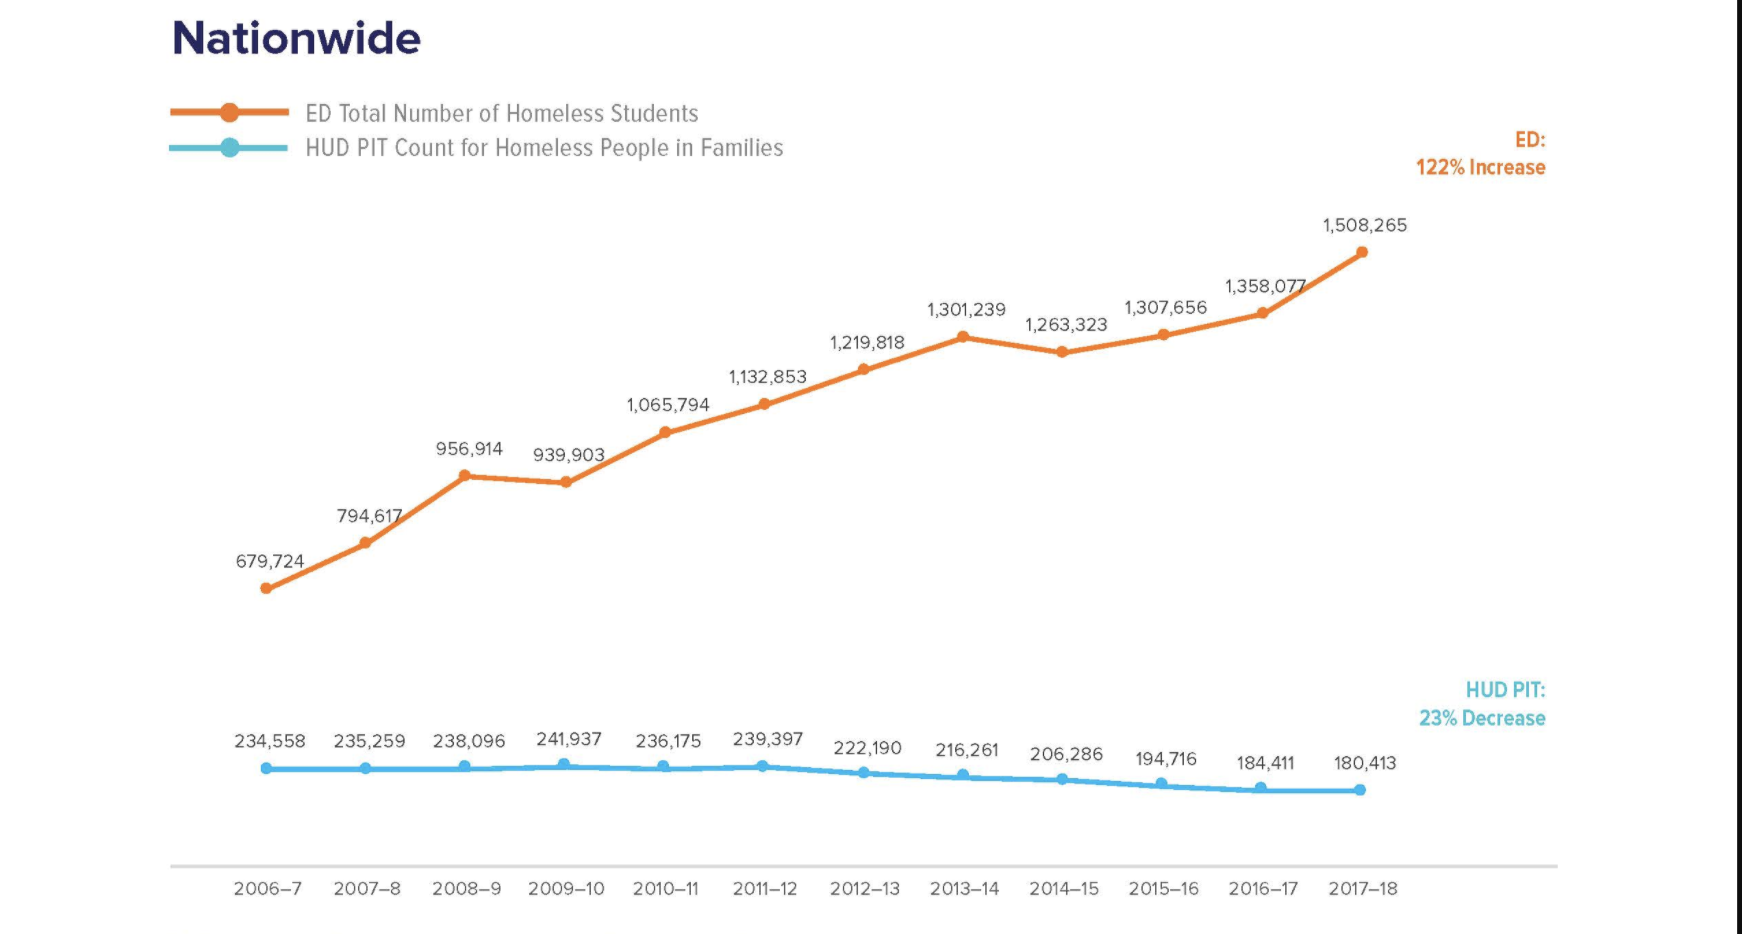

In [53]:
from IPython.display import Image
Image('homeless.png')

#### In Janurary 2020, the Insitutite for Homelessnes and Children Services reported that there has been a total of 122% increase for homeless students, students in the foster care system are more than likely to experience homeless with a 68% of youth that has minimal social service use – including, homeless, foster care, jail, hospital, subsidized housing (NYCHA and/or Section 8), and supportive housing. 8% face homeless later on in their life, and 8% experience it earlier in their life for 1-2 years, consistently going back which was reported by the CSH in 2018. 

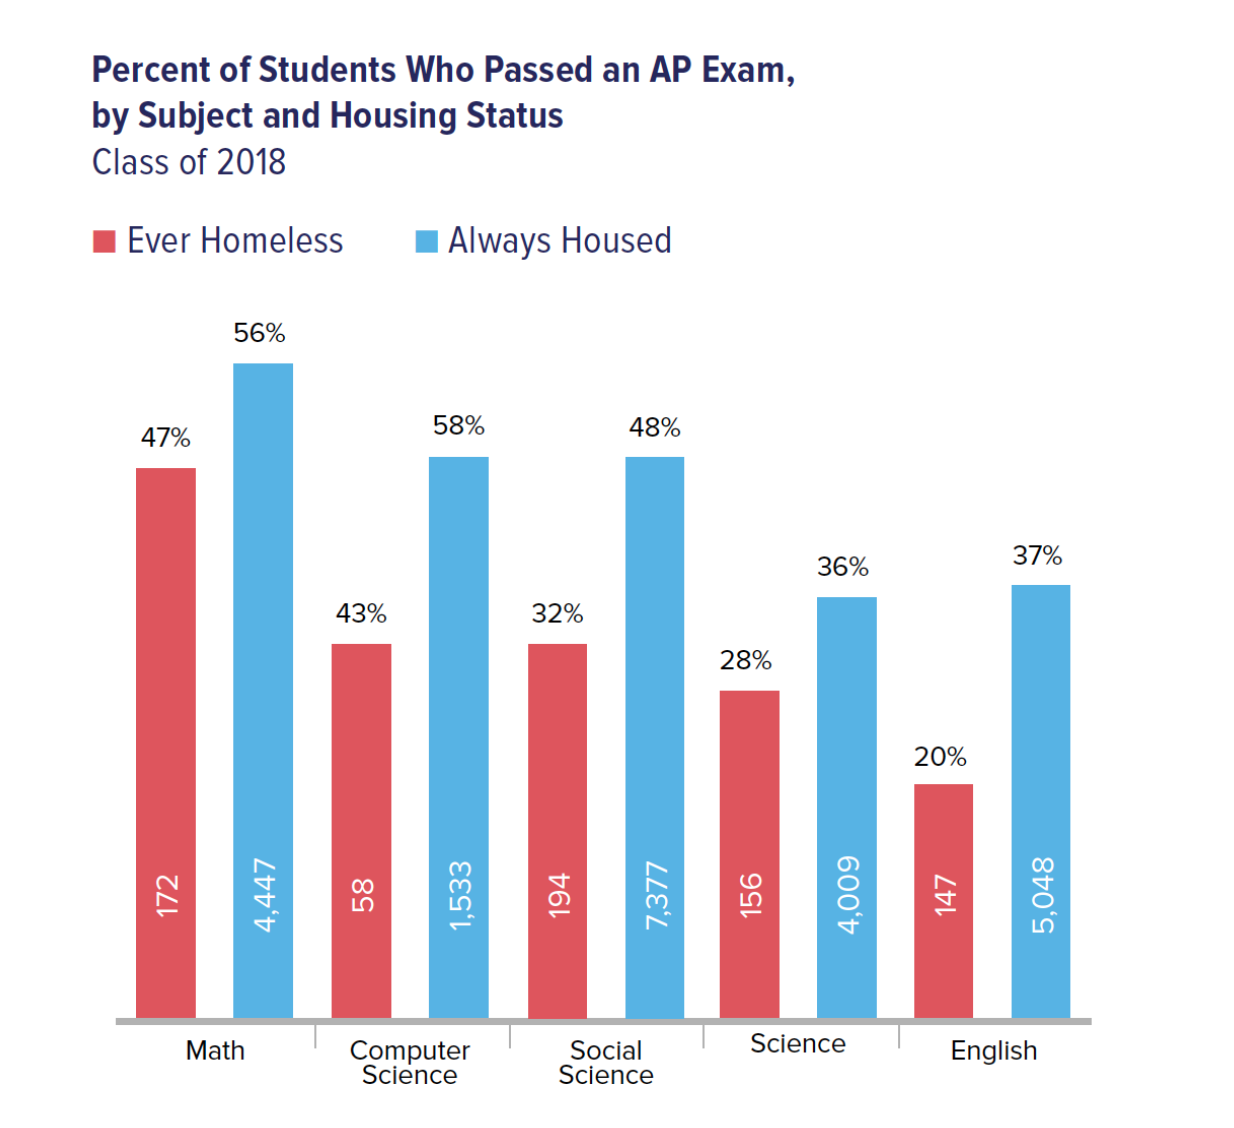

In [54]:
from IPython.display import Image
Image('ap_exam.png')

#### Those who experience homeless are capable of passsing just as much as those who are not homeless and in the system with 47% of 172 students passing the Math AP exam, without the proper resources tools and education being placed to encorurage for these students to go further in their education and outreach for more help they will not adapt their education further to reach high scores in their education. 

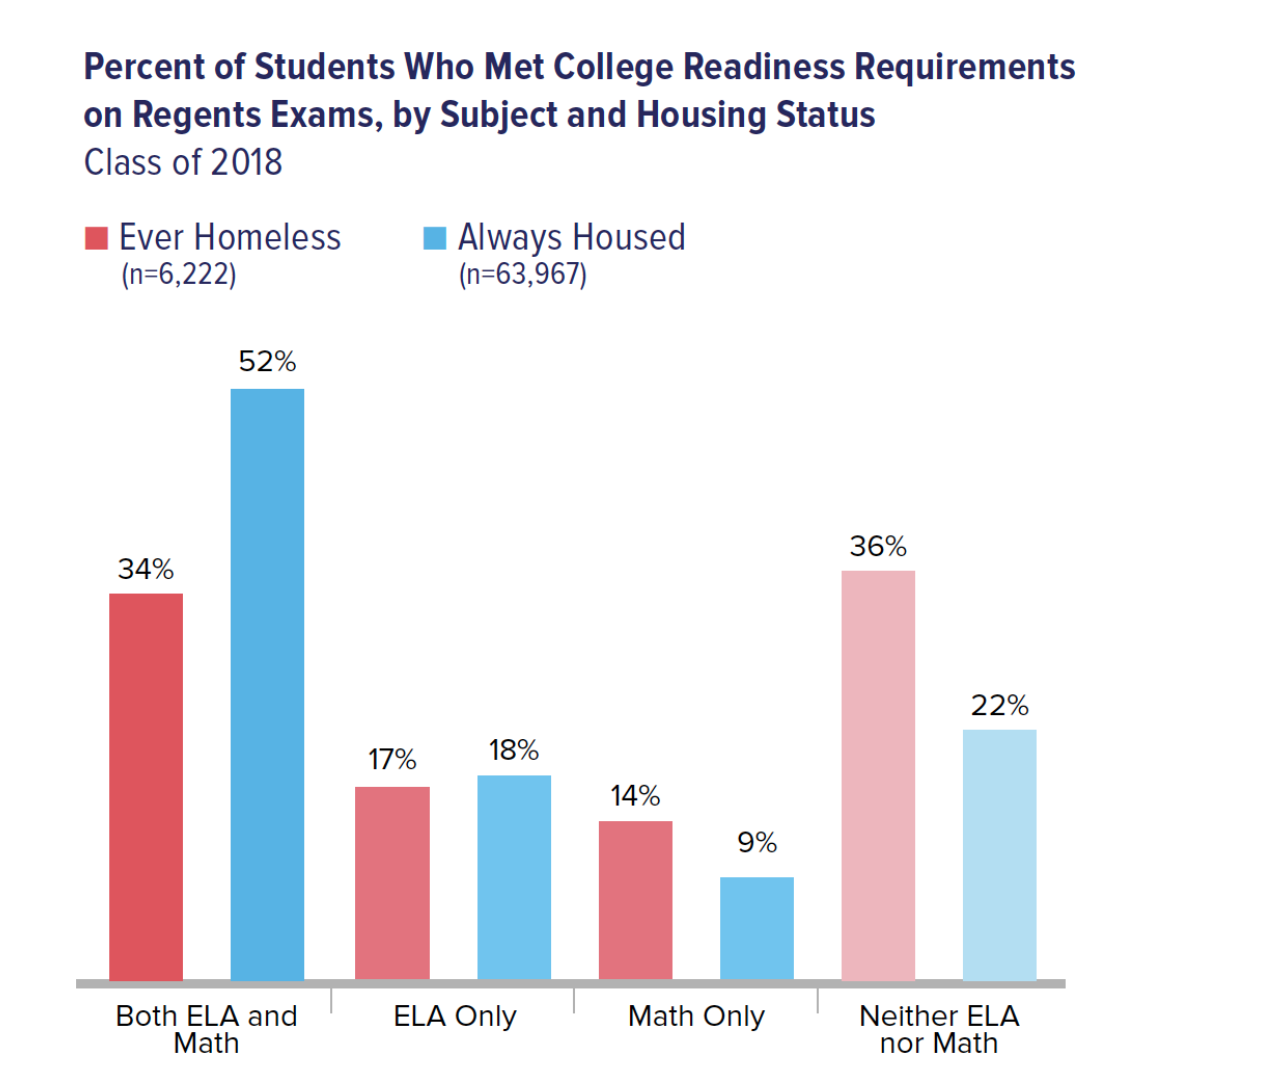

In [55]:
from IPython.display import Image
Image('regents_exam.png')

#### The identifying that they may not be ready for college are early indicators before they enter high school based on ELA and math scores not being high enough. The resources can then be starting to identified in middle school, and the finacial resources can be placed earlier on during this time. 

### Analyzing Abuse and Neglect with Foster Care Data

#### There are other indicating factors in the foster care system such as the abuse and neglect that occur in the system, that impact their education. 

In [56]:
abuse = pd.read_csv("Abuse_Neglect_by_CD_2015_-_2020.csv",header = None)
abuse 

0    1   \
0   Abuse/Neglect Investigations by Community Dist...  NaN   
1                                                 NaN  NaN   
2                         Borough/Community District1  NaN   
3                                                 NaN  NaN   
4                                               BRONX  NaN   
..                                                ...  ...   
78  Prepared  by ACS, Division of Policy, Planning...  NaN   
79                          Data Source:  Connections  NaN   
80                                                NaN  NaN   
81                                                NaN  NaN   
82                                                NaN  NaN   

                             2      3         4                 5   \
0                           NaN    NaN       NaN               NaN   
1                          2015    NaN       NaN               NaN   
2   Consolidated Investigations    NaN       NaN  Indication Rate3   
3                        Number  Rank2  Children               NaN   
4                           NaN    NaN       NaN               NaN   
..                          ...    ...       ...               ...   
78                          NaN    NaN       NaN               NaN   
79                          NaN    NaN       NaN               NaN   
80                          NaN    NaN       NaN               NaN   
81                          NaN    NaN       NaN               NaN   
82                          NaN    NaN       NaN               NaN   

                             6     7         8                9   ...  \
0                           NaN   NaN       NaN              NaN  ...   
1                          2016   NaN       NaN              NaN  ...   
2   Consolidated Investigations   NaN       NaN  Indication Rate  ...   
3                        Number  Rank  Children              NaN  ...   
4                           NaN   NaN       NaN              NaN  ...   
..                          ...   ...       ...              ...  ...   
78                          NaN   NaN       NaN              NaN  ...   
79                          NaN   NaN       NaN              NaN  ...   
80                          NaN   NaN       NaN              NaN  ...   
81                          NaN   NaN       NaN              NaN  ...   
82                          NaN   NaN       NaN              NaN  ...   

          16               17                           18    19        20  \
0        NaN              NaN                          NaN   NaN       NaN   
1        NaN              NaN                         2019   NaN       NaN   
2        NaN  Indication Rate  Consolidated Investigations   NaN       NaN   
3   Children              NaN                       Number  Rank  Children   
4        NaN              NaN                          NaN   NaN       NaN   
..       ...              ...                          ...   ...       ...   
78       NaN              NaN                          NaN   NaN       NaN   
79       NaN              NaN                          NaN   NaN       NaN   
80       NaN              NaN                          NaN   NaN       NaN   
81       NaN              NaN                          NaN   NaN       NaN   
82       NaN              NaN                          NaN   NaN       NaN   

                 21                           22    23        24  \
0               NaN                          NaN   NaN       NaN   
1               NaN                         2020   NaN       NaN   
2   Indication Rate  Consolidated Investigations   NaN       NaN   
3               NaN                       Number  Rank  Children   
4               NaN                          NaN   NaN       NaN   
..              ...                          ...   ...       ...   
78              NaN                          NaN   NaN       NaN   
79              NaN                          NaN   NaN       NaN   
80              NaN                    

### So we are going to analyze our data by taking a look at in sections by borough, since we are looking at data from the foster care system of 2020 we are going to look at the abuse and neglect reports of 2020. 

In [57]:
abuse[4:]

0                     1   \
4                                               BRONX                   NaN   
5                                               BX01     Mott Haven/Melrose   
6                                               BX02   Hunts Point/Longwood   
7                                               BX03     Morrisania/Crotona   
8                                               BX04   Highbridge/Concourse   
..                                                ...                   ...   
78  Prepared  by ACS, Division of Policy, Planning...                   NaN   
79                          Data Source:  Connections                   NaN   
80                                                NaN                   NaN   
81                                                NaN                   NaN   
82                                                NaN                   NaN   

         2    3        4      5        6    7        8      9   ...       16  \
4       NaN  NaN      NaN    NaN      NaN  NaN      NaN    NaN  ...      NaN   
5    1,674     8   2,583   35.0%   1,699     9   2,517   32.6%  ...   2,860    
6      929    20   1,480   37.7%     933    21   1,459   35.4%  ...   1,479    
7    1,428    11   2,323   37.7%   1,456    12   2,372   37.2%  ...   2,626    
8    1,831     3   2,892   36.6%   2,022     2   3,173   39.5%  ...   3,142    
..      ...  ...      ...    ...      ...  ...      ...    ...  ...      ...   
78      NaN  NaN      NaN    NaN      NaN  NaN      NaN    NaN  ...      NaN   
79      NaN  NaN      NaN    NaN      NaN  NaN      NaN    NaN  ...      NaN   
80      NaN  NaN      NaN    NaN      NaN  NaN      NaN    NaN  ...      NaN   
81      NaN  NaN      NaN    NaN      NaN  NaN      NaN    NaN  ...      NaN   
82      NaN  NaN      NaN    NaN      NaN  NaN      NaN    NaN  ...      NaN   

       17       18   19       20     21       22    23       24     25  
4     NaN      NaN  NaN      NaN    NaN      NaN   NaN      NaN    NaN  
5   36.6%   1,799     6   2,830   39.8%   1,338     6    2,108   36.1%  
6   36.9%     877    21   1,363   36.0%     570    27      903   39.3%  
7   42.3%   1,487    12   2,444   39.0%   1,145    10    1,991   37.6%  
8   35.3%   1,846     4   2,931   33.2%   1,430     4    2,393   30.0%  
..    ...      ...  ...      ...    ...      ...   ...      ...    ...  
78    NaN      NaN  NaN      NaN    NaN      NaN   NaN      NaN    NaN  
79    NaN      NaN  NaN      NaN    NaN      NaN   NaN      NaN    NaN  
80    NaN      NaN  NaN      NaN    NaN      NaN   NaN      NaN    NaN  
81    NaN      NaN  NaN      NaN    NaN      NaN   NaN      NaN    NaN  
82    NaN      NaN  NaN      NaN    NaN      NaN   NaN      NaN    NaN  

[79 rows x 26 columns]

#### Since this dataframe goes from the years 2015-2020 we only need to analyze the years in which we saw prevelant and relevant to our dataframe which is 2020.Therefore we are going to drop the rest of our columns, 

In [58]:
abuse.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],axis=1,inplace=True)

#### We need to rename these columns for the appropiate direction borough, community district, number, rank, children, indication rate 

#### We are going to split these dataframe as they posses many null values based on boroughs to merge into one, and see the overall impact it has had per each child and borough. 

In [59]:
bronx = abuse[5:17]

In [60]:
bronx

0                               1        22    23       24     25
5   BX01               Mott Haven/Melrose   1,338     6    2,108   36.1%
6   BX02             Hunts Point/Longwood     570    27      903   39.3%
7   BX03               Morrisania/Crotona   1,145    10    1,991   37.6%
8   BX04             Highbridge/Concourse   1,430     4    2,393   30.0%
9   BX05       Fordham/University Heights   1,077    11    1,767   31.1%
10  BX06             Belmont/East Tremont   1,043    12    1,820   36.7%
11  BX07   Kingsbridge Heights/Bedford Pk     900    15    1,409   33.2%
12  BX08             Riverdale/Fieldstone     381    46      573   32.3%
13  BX09            Parkchester/Soundview   1,484     2    2,599   35.0%
14   BX10          Throgs Neck/Co-op City     553    28      869   32.4%
15   BX11           Morris Park/Bronxdale     597    24      997   29.5%
16   BX12       Williamsbridge/Baychester   1,211     7    2,000   35.5%

In [61]:
bronx = bronx.rename(columns={0: "Borough", 1: "Community_District",22:"Number of Investigations",23:"Rank",24:"Number of Children",25:"Indication Rate"})

In [62]:
bronx

Borough              Community_District Number of Investigations  Rank  \
5    BX01               Mott Haven/Melrose                   1,338     6    
6    BX02             Hunts Point/Longwood                     570    27    
7    BX03               Morrisania/Crotona                   1,145    10    
8    BX04             Highbridge/Concourse                   1,430     4    
9    BX05       Fordham/University Heights                   1,077    11    
10   BX06             Belmont/East Tremont                   1,043    12    
11   BX07   Kingsbridge Heights/Bedford Pk                     900    15    
12   BX08             Riverdale/Fieldstone                     381    46    
13   BX09            Parkchester/Soundview                   1,484     2    
14    BX10          Throgs Neck/Co-op City                     553    28    
15    BX11           Morris Park/Bronxdale                     597    24    
16    BX12       Williamsbridge/Baychester                   1,211     7    

   Number of Children Indication Rate  
5              2,108            36.1%  
6                903            39.3%  
7              1,991            37.6%  
8              2,393            30.0%  
9              1,767            31.1%  
10             1,820            36.7%  
11             1,409            33.2%  
12               573            32.3%  
13             2,599            35.0%  
14               869            32.4%  
15               997            29.5%  
16             2,000            35.5%

In [63]:
bronx['Number of Investigations'] = bronx['Number of Investigations'].str.replace(",",'')

In [64]:
bronx['Number of Investigations'] = bronx['Number of Investigations'].apply(pd.to_numeric)

In [65]:
grouped = bronx.groupby('Community_District')['Number of Investigations'].sum()
new_df = pd.DataFrame(list(grouped.items()), columns=['Community_District', 'Number of Investigations'])
source = ColumnDataSource(data=new_df)
p = figure(y_range=new_df['Community_District'], title="Bronx Community District Investigations")
borough_names = source.data['Community_District'].tolist()
color_map=factor_cmap(field_name='Community_District',palette=Spectral6, factors=borough_names)
p.hbar(y='Community_District', right='Number of Investigations', source = source,height=0.8,color = color_map, legend_label='Total of Open Investigations')
p.add_tools(HoverTool())
p.xaxis.axis_label = 'Number of Investigations'
p.yaxis.axis_label = 'Community_District'
show(p) 

#### From this, we are able to view the most amount of abuse and neglect that occurs within each community district and see what areas social workers need to be involved individually. We see how many open investigations haven't been take care of in a judicial court and allowed for those who have been moved from the system.

#### We are able to analyze that the abuse and neglect is the most prevelant in HighBridge/ Parkchester, Concourse, and Baychester in the Bronx.

#### We will be repeating these same steps for the rest of the boroughs. 

In [66]:
brooklyn = abuse[19:37]

In [67]:
brooklyn = brooklyn.rename(columns={0: "Borough", 1: "Community_District",22:"Number of Investigations",23:"Rank",24:"Number of Children",25:"Indication Rate"})

In [68]:
brooklyn

Borough            Community_District Number of Investigations  Rank  \
19    BK01       Greenpoint/Williamsburg                     441    38    
20    BK02  Fort Greene/Brooklyn Heights                     314    49    
21    BK03            Bedford Stuyvesant                     880    16    
22    BK04                      Bushwick                     501    33    
23    BK05   East New York/Starrett City                   1,465     3    
24    BK06    Park Slope/Carroll Gardens                     289    51    
25    BK07                   Sunset Park                     440    39    
26    BK08                 Crown Heights                     496    34    
27    BK09     S. Crown Heights/Prospect                     408    45    
28    BK10       Bay Ridge/Dyker Heights                     257    53    
29    BK11                   Bensonhurst                     430    40    
30    BK12                  Borough Park                     350    47    
31    BK13                  Coney Island                     584    25    
32    BK14              Flatbush/Midwood                     516    32    
33    BK15                Sheepshead Bay                     426    41    
34    BK16                   Brownsville                   1,192     9    
35    BK17                 East Flatbush                     863    17    
36    BK18            Flatlands/Canarsie                     837    18    

   Number of Children Indication Rate  
19               696            42.0%  
20               491            41.4%  
21             1,448            44.0%  
22               810            44.1%  
23             2,476            34.9%  
24               430            44.3%  
25               667            49.5%  
26               767            40.9%  
27               607            30.4%  
28               385            42.4%  
29               687            50.0%  
30               589            48.9%  
31               978            46.1%  
32               800            39.0%  
33               672            39.2%  
34             2,097            47.5%  
35             1,382            45.1%  
36             1,298            41.8%

In [69]:
manhattan = abuse[39:50]

In [70]:
manhattan = manhattan.rename(columns={0: "Borough", 1: "Community_District",22:"Number of Investigations",23:"Rank",24:"Number of Children",25:"Indication Rate"})

In [71]:
manhattan

Borough            Community_District Number of Investigations  Rank  \
39    MN01            Financial District                      79    58    
40    MN02        Greenwich Village/Soho                      53    59    
41    MN03     Lower East Side/Chinatown                     724    20    
42    MN04               Clinton/Chelsea                     292    50    
43    MN05                       Midtown                     277    52    
44    MN06    Stuyvesant Town/Turtle Bay                     126    57    
45    MN07               Upper West Side                     417    43    
46    MN08               Upper East Side                     217    54    
47    MN09  Morningside Height./Hamilton                     495    35    
48    MN10                Central Harlem                     993    13    
49    MN11                   East Harlem                   1,209     8    

   Number of Children Indication Rate  
39               121            19.0%  
40                65            15.1%  
41             1,067            30.7%  
42               423            31.3%  
43               403            41.9%  
44               161            31.7%  
45               609            33.3%  
46               294            30.0%  
47               716            34.5%  
48             1,475            29.1%  
49             1,873            32.8%

In [72]:
queens = abuse[53:67]

In [73]:
queens = queens.rename(columns={0: "Borough", 1: "Community_District",22:"Number of Investigations",23:"Rank",24:"Number of Children",25:"Indication Rate"})

In [74]:
queens

Borough          Community_District Number of Investigations  Rank  \
53    QN01                     Astoria                     578    26    
54    QN02          Woodside/Sunnyside                     322    48    
55    QN03             Jackson Heights                     728    19    
56    QN04             Elmhurst/Corona                     633    23    
57    QN05           Ridgewood/Maspeth                     480    36    
58    QN06      Rego Park/Forest Hills                     179    56    
59    QN07         Flushing/Whitestone                     522    29    
60    QN08     Hillcrest/Fresh Meadows                     409    44    
61    QN09        Ozone Park/Woodhaven                     518    31    
62    QN10  S. Ozone Park/Howard Beach                     445    37    
63    QN11         Bayside/Little Neck                     190    55    
64    QN12              Jamaica/Hollis                   1,384     5    
65    QN13              Queens Village                     702    21    
66    QN14      Rockaway/Broad Channel                     932    14    

   Number of Children Indication Rate  
53               867            30.8%  
54               490            37.0%  
55             1,066            44.9%  
56               907            41.2%  
57               721            34.6%  
58               253            34.1%  
59               747            34.9%  
60               619            35.0%  
61               734            33.7%  
62               679            31.7%  
63               268            31.1%  
64             2,146            37.7%  
65             1,009            32.5%  
66             1,520            36.8%

In [75]:
queens['Indication Rate'] = queens['Indication Rate'].str.replace("%",'')

In [76]:
queens['Indication Rate'] = queens['Indication Rate'].apply(pd.to_numeric) 

In [77]:
queens['Number of Investigations'] = queens['Number of Investigations'].str.replace(",",'')

In [78]:
queens['Number of Investigations'] = queens['Number of Investigations'].apply(pd.to_numeric) 

In [79]:
queens

Borough          Community_District  Number of Investigations  Rank  \
53    QN01                     Astoria                       578   26    
54    QN02          Woodside/Sunnyside                       322   48    
55    QN03             Jackson Heights                       728   19    
56    QN04             Elmhurst/Corona                       633   23    
57    QN05           Ridgewood/Maspeth                       480   36    
58    QN06      Rego Park/Forest Hills                       179   56    
59    QN07         Flushing/Whitestone                       522   29    
60    QN08     Hillcrest/Fresh Meadows                       409   44    
61    QN09        Ozone Park/Woodhaven                       518   31    
62    QN10  S. Ozone Park/Howard Beach                       445   37    
63    QN11         Bayside/Little Neck                       190   55    
64    QN12              Jamaica/Hollis                      1384    5    
65    QN13              Queens Village                       702   21    
66    QN14      Rockaway/Broad Channel                       932   14    

   Number of Children  Indication Rate  
53               867              30.8  
54               490              37.0  
55             1,066              44.9  
56               907              41.2  
57               721              34.6  
58               253              34.1  
59               747              34.9  
60               619              35.0  
61               734              33.7  
62               679              31.7  
63               268              31.1  
64             2,146              37.7  
65             1,009              32.5  
66             1,520              36.8

In [80]:
grouped = queens.groupby('Community_District')['Number of Investigations'].sum()
new_df = pd.DataFrame(list(grouped.items()), columns=['Community_District', 'Number of Investigations'])
source = ColumnDataSource(data=new_df)
p = figure(y_range=new_df['Community_District'], title="Queens Community District")
borough_names = source.data['Community_District'].tolist()
color_map=factor_cmap(field_name='Community_District',palette=Spectral6, factors=borough_names)
p.hbar(y='Community_District', right='Number of Investigations', source = source,height=0.8,color = color_map, legend_label='Total of Open Investigations')
p.add_tools(HoverTool())
p.xaxis.axis_label = 'Number of Investigations'
p.yaxis.axis_label = 'Community_District'
show(p) 

#### In Queens, the most prevelant boroughs that have open investigations are Jamaica/ Hollis, and Rockaway/ Broad Channel

In [81]:
staten_island = abuse[69:71]

In [82]:
staten_island = staten_island.rename(columns={0: "Borough", 1: "Community_District",22:"Number of Investigations",23:"Rank",24:"Number of Children",25:"Indication Rate"})

In [83]:
staten_island

Borough       Community_District Number of Investigations  Rank  \
69    SI01   Saint George/Stapleton                   1,494     1    
70    SI02  South Beach/Willowbrook                     522    30    

   Number of Children Indication Rate  
69             2,583            29.5%  
70               757            24.9%

In [84]:
group = staten_island.groupby('Community_District')['Indication Rate']

In [85]:
group

In [86]:
group = staten_island.groupby('Community_District')['Indication Rate'].value_counts()

In [87]:
group

Community_District       Indication Rate
Saint George/Stapleton   29.5%              1
South Beach/Willowbrook  24.9%              1
Name: Indication Rate, dtype: int64

### Concast all the boroughs under one dataframe so we can graph, based on ranking, and indication rate 

In [88]:
abuse_boroughs = pd.concat([bronx,brooklyn,manhattan,queens,staten_island],axis=0,sort=False)

In [89]:
abuse_boroughs

Borough              Community_District Number of Investigations  Rank  \
5    BX01               Mott Haven/Melrose                     1338    6    
6    BX02             Hunts Point/Longwood                      570   27    
7    BX03               Morrisania/Crotona                     1145   10    
8    BX04             Highbridge/Concourse                     1430    4    
9    BX05       Fordham/University Heights                     1077   11    
10   BX06             Belmont/East Tremont                     1043   12    
11   BX07   Kingsbridge Heights/Bedford Pk                      900   15    
12   BX08             Riverdale/Fieldstone                      381   46    
13   BX09            Parkchester/Soundview                     1484    2    
14    BX10          Throgs Neck/Co-op City                      553   28    
15    BX11           Morris Park/Bronxdale                      597   24    
16    BX12       Williamsbridge/Baychester                     1211    7    
19    BK01         Greenpoint/Williamsburg                     441    38    
20    BK02    Fort Greene/Brooklyn Heights                     314    49    
21    BK03              Bedford Stuyvesant                     880    16    
22    BK04                        Bushwick                     501    33    
23    BK05     East New York/Starrett City                   1,465     3    
24    BK06      Park Slope/Carroll Gardens                     289    51    
25    BK07                     Sunset Park                     440    39    
26    BK08                   Crown Heights                     496    34    
27    BK09       S. Crown Heights/Prospect                     408    45    
28    BK10         Bay Ridge/Dyker Heights                     257    53    
29    BK11                     Bensonhurst                     430    40    
30    BK12                    Borough Park                     350    47    
31    BK13                    Coney Island                     584    25    
32    BK14                Flatbush/Midwood                     516    32    
33    BK15                  Sheepshead Bay                     426    41    
34    BK16                     Brownsville                   1,192     9    
35    BK17                   East Flatbush                     863    17    
36    BK18              Flatlands/Canarsie                     837    18    
39    MN01              Financial District                      79    58    
40    MN02          Greenwich Village/Soho                      53    59    
41    MN03       Lower East Side/Chinatown                     724    20    
42    MN04                 Clinton/Chelsea                     292    50    
43    MN05                         Midtown                     277    52    
44    MN06      Stuyvesant Town/Turtle Bay                     126    57    
45    MN07                 Upper West Side                     417    43    
46    MN08                 Upper East Side                     217    54    
47    MN09    Morningside Height./Hamilton                     495    35    
48    MN10                  Central Harlem                     993    13    
49    MN11                     East Harlem                   1,209     8    
53    QN01                         Astoria                      578   26    
54    QN02              Woodside/Sunnyside                      322   48    
55    QN03                 Jackson Heights                      728   19    
56    QN04                 Elmhurst/Corona                      633   23    
57    QN05               Ridgewood/Maspeth                      480   36    
58    QN06          Rego Park/Forest Hills                      179   56    
59    QN07             Flushing/Whitestone                      522   29    
60    QN08         Hillcrest/Fresh Meadows                      409   44    
61    QN09            Ozone Park/Woodhaven                      518   31    
62    QN10      S. Ozone Park/Howard Beach                      445   37    

In [90]:
abuse_boroughs['Number of Investigations'] = abuse_boroughs['Number of Investigations'].str.replace(",",'')

In [91]:
abuse_boroughs

Borough              Community_District Number of Investigations  Rank  \
5    BX01               Mott Haven/Melrose                      NaN    6    
6    BX02             Hunts Point/Longwood                      NaN   27    
7    BX03               Morrisania/Crotona                      NaN   10    
8    BX04             Highbridge/Concourse                      NaN    4    
9    BX05       Fordham/University Heights                      NaN   11    
10   BX06             Belmont/East Tremont                      NaN   12    
11   BX07   Kingsbridge Heights/Bedford Pk                      NaN   15    
12   BX08             Riverdale/Fieldstone                      NaN   46    
13   BX09            Parkchester/Soundview                      NaN    2    
14    BX10          Throgs Neck/Co-op City                      NaN   28    
15    BX11           Morris Park/Bronxdale                      NaN   24    
16    BX12       Williamsbridge/Baychester                      NaN    7    
19    BK01         Greenpoint/Williamsburg                     441    38    
20    BK02    Fort Greene/Brooklyn Heights                     314    49    
21    BK03              Bedford Stuyvesant                     880    16    
22    BK04                        Bushwick                     501    33    
23    BK05     East New York/Starrett City                    1465     3    
24    BK06      Park Slope/Carroll Gardens                     289    51    
25    BK07                     Sunset Park                     440    39    
26    BK08                   Crown Heights                     496    34    
27    BK09       S. Crown Heights/Prospect                     408    45    
28    BK10         Bay Ridge/Dyker Heights                     257    53    
29    BK11                     Bensonhurst                     430    40    
30    BK12                    Borough Park                     350    47    
31    BK13                    Coney Island                     584    25    
32    BK14                Flatbush/Midwood                     516    32    
33    BK15                  Sheepshead Bay                     426    41    
34    BK16                     Brownsville                    1192     9    
35    BK17                   East Flatbush                     863    17    
36    BK18              Flatlands/Canarsie                     837    18    
39    MN01              Financial District                      79    58    
40    MN02          Greenwich Village/Soho                      53    59    
41    MN03       Lower East Side/Chinatown                     724    20    
42    MN04                 Clinton/Chelsea                     292    50    
43    MN05                         Midtown                     277    52    
44    MN06      Stuyvesant Town/Turtle Bay                     126    57    
45    MN07                 Upper West Side                     417    43    
46    MN08                 Upper East Side                     217    54    
47    MN09    Morningside Height./Hamilton                     495    35    
48    MN10                  Central Harlem                     993    13    
49    MN11                     East Harlem                    1209     8    
53    QN01                         Astoria                      NaN   26    
54    QN02              Woodside/Sunnyside                      NaN   48    
55    QN03                 Jackson Heights                      NaN   19    
56    QN04                 Elmhurst/Corona                      NaN   23    
57    QN05               Ridgewood/Maspeth                      NaN   36    
58    QN06          Rego Park/Forest Hills                      NaN   56    
59    QN07             Flushing/Whitestone                      NaN   29    
60    QN08         Hillcrest/Fresh Meadows                      NaN   44    
61    QN09            Ozone Park/Woodhaven                      NaN   31    
62    QN10      S. Ozone Park/Howard Beach                      NaN   37    

In [92]:
abuse_boroughs['Number of Children'] = abuse_boroughs['Number of Children'].str.replace(",",'')

#### We will be replacing the , comma values for thoe who are greater than 100 to be able to graph it. 

In [93]:
abuse_boroughs

Borough              Community_District Number of Investigations  Rank  \
5    BX01               Mott Haven/Melrose                      NaN    6    
6    BX02             Hunts Point/Longwood                      NaN   27    
7    BX03               Morrisania/Crotona                      NaN   10    
8    BX04             Highbridge/Concourse                      NaN    4    
9    BX05       Fordham/University Heights                      NaN   11    
10   BX06             Belmont/East Tremont                      NaN   12    
11   BX07   Kingsbridge Heights/Bedford Pk                      NaN   15    
12   BX08             Riverdale/Fieldstone                      NaN   46    
13   BX09            Parkchester/Soundview                      NaN    2    
14    BX10          Throgs Neck/Co-op City                      NaN   28    
15    BX11           Morris Park/Bronxdale                      NaN   24    
16    BX12       Williamsbridge/Baychester                      NaN    7    
19    BK01         Greenpoint/Williamsburg                     441    38    
20    BK02    Fort Greene/Brooklyn Heights                     314    49    
21    BK03              Bedford Stuyvesant                     880    16    
22    BK04                        Bushwick                     501    33    
23    BK05     East New York/Starrett City                    1465     3    
24    BK06      Park Slope/Carroll Gardens                     289    51    
25    BK07                     Sunset Park                     440    39    
26    BK08                   Crown Heights                     496    34    
27    BK09       S. Crown Heights/Prospect                     408    45    
28    BK10         Bay Ridge/Dyker Heights                     257    53    
29    BK11                     Bensonhurst                     430    40    
30    BK12                    Borough Park                     350    47    
31    BK13                    Coney Island                     584    25    
32    BK14                Flatbush/Midwood                     516    32    
33    BK15                  Sheepshead Bay                     426    41    
34    BK16                     Brownsville                    1192     9    
35    BK17                   East Flatbush                     863    17    
36    BK18              Flatlands/Canarsie                     837    18    
39    MN01              Financial District                      79    58    
40    MN02          Greenwich Village/Soho                      53    59    
41    MN03       Lower East Side/Chinatown                     724    20    
42    MN04                 Clinton/Chelsea                     292    50    
43    MN05                         Midtown                     277    52    
44    MN06      Stuyvesant Town/Turtle Bay                     126    57    
45    MN07                 Upper West Side                     417    43    
46    MN08                 Upper East Side                     217    54    
47    MN09    Morningside Height./Hamilton                     495    35    
48    MN10                  Central Harlem                     993    13    
49    MN11                     East Harlem                    1209     8    
53    QN01                         Astoria                      NaN   26    
54    QN02              Woodside/Sunnyside                      NaN   48    
55    QN03                 Jackson Heights                      NaN   19    
56    QN04                 Elmhurst/Corona                      NaN   23    
57    QN05               Ridgewood/Maspeth                      NaN   36    
58    QN06          Rego Park/Forest Hills                      NaN   56    
59    QN07             Flushing/Whitestone                      NaN   29    
60    QN08         Hillcrest/Fresh Meadows                      NaN   44    
61    QN09            Ozone Park/Woodhaven                      NaN   31    
62    QN10      S. Ozone Park/Howard Beach                      NaN   37    

#### All these rows need to be converted to a numeric value to be able to graph and display it 

In [94]:
abuse_boroughs['Number of Children'] = abuse_boroughs['Number of Children'].apply(pd.to_numeric)

In [95]:
abuse_boroughs['Number of Investigations'] = abuse_boroughs['Number of Investigations'].apply(pd.to_numeric) 

In [96]:
abuse_boroughs['Rank'] = abuse_boroughs['Rank'].apply(pd.to_numeric) 

In [97]:
abuse_boroughs['Indication Rate'] = abuse_boroughs['Indication Rate'].str.replace("%",'')

#### We will also be replacing the values that contain a percentage mark as they aren't abel to be identified even as a float. 

In [98]:
abuse_boroughs['Indication Rate'] = abuse_boroughs['Indication Rate'].apply(pd.to_numeric) 

In [99]:
abuse_boroughs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 5 to 70
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borough                   57 non-null     object 
 1   Community_District        57 non-null     object 
 2   Number of Investigations  31 non-null     float64
 3   Rank                      57 non-null     int64  
 4   Number of Children        57 non-null     int64  
 5   Indication Rate           43 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.1+ KB


#### We are representing the rank of each community district placed in the foster case system to analyze those who rank the highest and display that they need the most amount of on careand investigations to be looked into.  

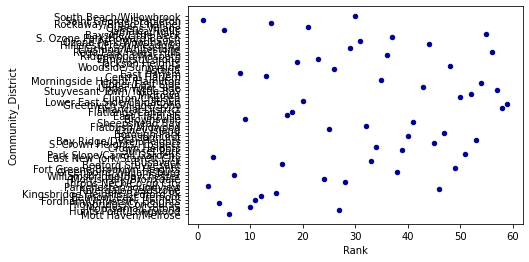

In [100]:
 ax1 = abuse_boroughs.plot.scatter(x='Rank',
                    y='Community_District',
                     c='DarkBlue',
                                  )
plt.rcParams["figure.figsize"] = (15,25)




### From this we are able to view that the overall community district that have the highest ranks of abuse and neglect consists of locations in Queens, Brooklyn, and Bronx where they have the highest amount of foster care agencies therefore representing that social case workers need to attend more to the physical and mental health being of those in these locations. 

## Explaratory Data Analysis <a id='4'></a>

### Comparison Against New Jersey 

#### Now we are going to be comparing data from Rutgers University that has been identified to comprehend New Jersey Foster Care System 

In [101]:
#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

#### Let's compare the gender of how many within the high school system are in the foster care system, to compare to how many there aee in New York City. 

In [102]:
new_jersey_gender = pd.read_csv('2020newjerseygender.csv')
new_jersey_gender

Year      Age  Gender      #
0  2020  13 - 17    Male  3,241
1  2020  13 - 17  Female  3,728

In [103]:
new_jersey_gender = new_jersey_gender.rename(columns={'#':'Total'})

In [104]:
new_jersey_gender

Year      Age  Gender  Total
0  2020  13 - 17    Male  3,241
1  2020  13 - 17  Female  3,728

In [105]:
new_jersey_gender = new_jersey_gender.drop(columns=['Age'])

#### In this circumstance, we drop age because we know the demographic into we are looking into

In [106]:
new_jersey_gender

Year  Gender  Total
0  2020    Male  3,241
1  2020  Female  3,728

In [107]:
new_jersey_gender.groupby('Gender')['Total'].sum()

Gender
Female    3,728
Male      3,241
Name: Total, dtype: object

In [108]:
bar1 = gender.groupby('Gender')['Total'].sum()
bar1

Gender
Female    3,839
Male      3,768
Name: Total, dtype: object

In [109]:
bar2 = new_jersey_gender.groupby('Gender')['Total'].sum()
bar2

Gender
Female    3,728
Male      3,241
Name: Total, dtype: object

#### Now we are going to merge the values from New York and New Jersey onto one dataframe to compare how many they are in New York or New Jersey.

In [110]:
gender_new_df = pd.merge(bar1,bar2,on = 'Gender',how='outer')

In [111]:
gender_new_df

Total_x Total_y
Gender                
Female   3,839   3,728
Male     3,768   3,241

In [112]:
gender_new_df = gender_new_df.rename(columns={'Total_x':'New York','Total_y':'New Jersey'})

In [113]:
gender_new_df

New York New Jersey
Gender                    
Female    3,839      3,728
Male      3,768      3,241

#### Overall there are 111 females less in New Jersey and 527 Males less in New Jersey. Overall, within the age-gap of 13-17 there are less people in foster care in New Jersey therefore displaying that there is a better system,as they do have similar populations.

In [114]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

output_file("nyandnj.html")

Gender  = ['Female','Male']
State = ['New York','New Jersey']

data = {'Gender' : Gender,
        'New York' : [3839,3768],
        'New Jersey' : [3728,3241],
       }

source = ColumnDataSource(data=data)

p = figure(x_range=Gender, y_range=(0, 5000), plot_height=350, title="In Foster Care By Gender",
           toolbar_location=None, tools="")

p.vbar(x=dodge('Gender', -0.25, range=p.x_range), top='New York', width=0.2, source=source,
       color="#c9d9d3", legend_label="New York")

p.vbar(x=dodge('Gender',  0.0,  range=p.x_range), top='New Jersey', width=0.2, source=source,
       color="#718dbf", legend_label="New Jersey")


p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

#### Now we are going to look at other significant disparities in the New Jersey foster care system, that we have already analyzed in New York City. 

In [115]:
new_jersey_race = pd.read_csv('NewJerseyRace.csv')
new_jersey_race

Year      Age             Race/Ethnicity     #
0  2020  13 - 17  Black or African American   298
1  2020  13 - 17                      White   173
2  2020  13 - 17                   Hispanic   214
3  2020  13 - 17    Missing or Undetermined  <10*
4  2020  13 - 17                      Other    55

In [116]:
new_jersey_race = new_jersey_race.rename(columns={'#':'Total','Race/Ethnicity':'Race'})

In [117]:
new_jersey_race

Year      Age                       Race Total
0  2020  13 - 17  Black or African American   298
1  2020  13 - 17                      White   173
2  2020  13 - 17                   Hispanic   214
3  2020  13 - 17    Missing or Undetermined  <10*
4  2020  13 - 17                      Other    55

In [118]:
new_jersey_race = new_jersey_race.drop(columns=['Age'])

In [119]:
new_jersey_race

Year                       Race Total
0  2020  Black or African American   298
1  2020                      White   173
2  2020                   Hispanic   214
3  2020    Missing or Undetermined  <10*
4  2020                      Other    55

In [120]:
nj = new_jersey_race.groupby('Race')['Total'].sum()
nj

Race
Black or African American     298
Hispanic                      214
Missing or Undetermined      <10*
Other                          55
White                         173
Name: Total, dtype: object

In [121]:
ny = race.groupby('Race')['Total'].sum()
ny

Race
African American     3,915
Asian                  193
Latinx               2,639
Other/Unknown          362
White                  498
Name: Total, dtype: object

In [122]:
race_new_df = pd.merge(nj,ny,on ='Race',how='outer')

In [123]:
race_new_df

Total_x Total_y
Race                                     
Black or African American     298     NaN
Hispanic                      214     NaN
Missing or Undetermined      <10*     NaN
Other                          55     NaN
White                         173     498
African American              NaN   3,915
Asian                         NaN     193
Latinx                        NaN   2,639
Other/Unknown                 NaN     362

In [124]:
race_new_df = race_new_df.rename(columns={'Total_x':'New Jersey','Total_y':'New York'})

In [125]:
race_new_df

New Jersey New York
Race                                         
Black or African American        298      NaN
Hispanic                         214      NaN
Missing or Undetermined         <10*      NaN
Other                             55      NaN
White                            173      498
African American                 NaN    3,915
Asian                            NaN      193
Latinx                           NaN    2,639
Other/Unknown                    NaN      362

In [126]:
race_new_df = race_new_df.fillna(0)

In [127]:
race_new_df

New Jersey New York
Race                                         
Black or African American        298        0
Hispanic                         214        0
Missing or Undetermined         <10*        0
Other                             55        0
White                            173      498
African American                   0    3,915
Asian                              0      193
Latinx                             0    2,639
Other/Unknown                      0      362

#### There are differences with the Race as New York and New Jersey identify the ethncity different because of this there are many null values, therefore we replace these values with a 0. There are inaccuracies however in this data, as there are more people in New York that are determined within the age group of high school  as they can be above 18 and within 18-19, which is not accounted for in the dataset for New Jersey.

In [128]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

output_file("nyandnj.html")

Race  = ['African American','Hispanic','Undetermined','Other','White','Asian','Other/Unknown']
State = ['New York','New Jersey']

data = {'Race' : Race,
        'New Jersey' : [298,214,9,55,173,0,0],
        'New York' : [3915,26398,0,362,498,193,362],
       }

source = ColumnDataSource(data=data)

p = figure(x_range=Race, y_range=(0, 15000), plot_height=350, title="Placed in Homes By Race",
           toolbar_location=None, tools="")

p.vbar(x=dodge('Race', -0.25, range=p.x_range), top='New York', width=0.8, source=source,
       color="#c9d9d3", legend_label="New York")

p.vbar(x=dodge('Race',  0.0,  range=p.x_range), top='New Jersey', width=0.8, source=source,
       color="#718dbf", legend_label="New Jersey")


p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

#### Overall there are more students in New York that are placed in the foster care system, than there is in New Jersey. 

#### Now we are going to analyze the abuse and neglect in New Jersey and the one's in New York 

In [129]:
nj_abuse = pd.read_csv('newjerseyabuse.csv')
nj_abuse

Year      County       #     %
0   2020         All  73,726  100%
1   2020    Atlantic   3,593    5%
2   2020      Bergen   4,044    5%
3   2020  Burlington   4,198    6%
4   2020      Camden   6,533    9%
5   2020    Cape May   1,117    2%
6   2020  Cumberland   2,880    4%
7   2020       Essex   7,708   10%
8   2020  Gloucester   3,334    5%
9   2020      Hudson   4,531    6%
10  2020   Hunterdon     589    1%
11  2020      Mercer   3,304    4%
12  2020   Middlesex   5,578    8%
13  2020    Monmouth   4,563    6%
14  2020      Morris   2,618    4%
15  2020       Ocean   5,326    7%
16  2020     Passaic   4,775    6%
17  2020       Salem     995    1%
18  2020    Somerset   2,031    3%
19  2020      Sussex   1,137    2%
20  2020       Union   3,681    5%
21  2020      Warren   1,190    2%
22  2020       Other    <10*    0%

In [130]:
nj_abuse = nj_abuse.rename(columns={'#':'Total','%':'Percentage'})

In [131]:
nj_abuse = nj_abuse.drop([0,22])

In [132]:
nj_abuse

Year      County  Total Percentage
1   2020    Atlantic  3,593         5%
2   2020      Bergen  4,044         5%
3   2020  Burlington  4,198         6%
4   2020      Camden  6,533         9%
5   2020    Cape May  1,117         2%
6   2020  Cumberland  2,880         4%
7   2020       Essex  7,708        10%
8   2020  Gloucester  3,334         5%
9   2020      Hudson  4,531         6%
10  2020   Hunterdon    589         1%
11  2020      Mercer  3,304         4%
12  2020   Middlesex  5,578         8%
13  2020    Monmouth  4,563         6%
14  2020      Morris  2,618         4%
15  2020       Ocean  5,326         7%
16  2020     Passaic  4,775         6%
17  2020       Salem    995         1%
18  2020    Somerset  2,031         3%
19  2020      Sussex  1,137         2%
20  2020       Union  3,681         5%
21  2020      Warren  1,190         2%

In [133]:
nj_abuse.dtypes

Year           int64
County        object
Total         object
Percentage    object
dtype: object

In [134]:
#nj_abuse = nj_abuse[["Total",'Percentage']].mean()

In [135]:
nj_abuse['Percentage'] = nj_abuse['Percentage'].str.replace("%",'')

In [136]:
nj_abuse['Percentage'] = nj_abuse['Percentage'].apply(pd.to_numeric) 

In [137]:
nj_abuse.dtypes

Year           int64
County        object
Total         object
Percentage     int64
dtype: object

In [138]:
nj_abuse['Total'] = nj_abuse['Total'].str.replace(",",'')

In [139]:
nj_abuse['Total'] = nj_abuse['Total'].apply(pd.to_numeric) 

In [140]:
nj_abuse.dtypes

Year           int64
County        object
Total          int64
Percentage     int64
dtype: object

In [141]:
nj_abuse

Year      County  Total  Percentage
1   2020    Atlantic   3593           5
2   2020      Bergen   4044           5
3   2020  Burlington   4198           6
4   2020      Camden   6533           9
5   2020    Cape May   1117           2
6   2020  Cumberland   2880           4
7   2020       Essex   7708          10
8   2020  Gloucester   3334           5
9   2020      Hudson   4531           6
10  2020   Hunterdon    589           1
11  2020      Mercer   3304           4
12  2020   Middlesex   5578           8
13  2020    Monmouth   4563           6
14  2020      Morris   2618           4
15  2020       Ocean   5326           7
16  2020     Passaic   4775           6
17  2020       Salem    995           1
18  2020    Somerset   2031           3
19  2020      Sussex   1137           2
20  2020       Union   3681           5
21  2020      Warren   1190           2

In [142]:
mean_nj_abuse = nj_abuse[["Total",'Percentage']].mean()

In [143]:
mean_nj_abuse

Total         3510.714286
Percentage       4.809524
dtype: float64

In [144]:
new_york_abuse = abuse_boroughs.rename(columns={'Number of Children':'Total','Indication Rate':'Percentage'}) 

In [145]:
new_york_abuse

Borough              Community_District  Number of Investigations  Rank  \
5    BX01               Mott Haven/Melrose                       NaN     6   
6    BX02             Hunts Point/Longwood                       NaN    27   
7    BX03               Morrisania/Crotona                       NaN    10   
8    BX04             Highbridge/Concourse                       NaN     4   
9    BX05       Fordham/University Heights                       NaN    11   
10   BX06             Belmont/East Tremont                       NaN    12   
11   BX07   Kingsbridge Heights/Bedford Pk                       NaN    15   
12   BX08             Riverdale/Fieldstone                       NaN    46   
13   BX09            Parkchester/Soundview                       NaN     2   
14    BX10          Throgs Neck/Co-op City                       NaN    28   
15    BX11           Morris Park/Bronxdale                       NaN    24   
16    BX12       Williamsbridge/Baychester                       NaN     7   
19    BK01         Greenpoint/Williamsburg                     441.0    38   
20    BK02    Fort Greene/Brooklyn Heights                     314.0    49   
21    BK03              Bedford Stuyvesant                     880.0    16   
22    BK04                        Bushwick                     501.0    33   
23    BK05     East New York/Starrett City                    1465.0     3   
24    BK06      Park Slope/Carroll Gardens                     289.0    51   
25    BK07                     Sunset Park                     440.0    39   
26    BK08                   Crown Heights                     496.0    34   
27    BK09       S. Crown Heights/Prospect                     408.0    45   
28    BK10         Bay Ridge/Dyker Heights                     257.0    53   
29    BK11                     Bensonhurst                     430.0    40   
30    BK12                    Borough Park                     350.0    47   
31    BK13                    Coney Island                     584.0    25   
32    BK14                Flatbush/Midwood                     516.0    32   
33    BK15                  Sheepshead Bay                     426.0    41   
34    BK16                     Brownsville                    1192.0     9   
35    BK17                   East Flatbush                     863.0    17   
36    BK18              Flatlands/Canarsie                     837.0    18   
39    MN01              Financial District                      79.0    58   
40    MN02          Greenwich Village/Soho                      53.0    59   
41    MN03       Lower East Side/Chinatown                     724.0    20   
42    MN04                 Clinton/Chelsea                     292.0    50   
43    MN05                         Midtown                     277.0    52   
44    MN06      Stuyvesant Town/Turtle Bay                     126.0    57   
45    MN07                 Upper West Side                     417.0    43   
46    MN08                 Upper East Side                     217.0    54   
47    MN09    Morningside Height./Hamilton                     495.0    35   
48    MN10                  Central Harlem                     993.0    13   
49    MN11                     East Harlem                    1209.0     8   
53    QN01                         Astoria                       NaN    26   
54    QN02              Woodside/Sunnyside                       NaN    48   
55    QN03                 Jackson Heights                       NaN    19   
56    QN04                 Elmhurst/Corona                       NaN    23   
57    QN05               Ridgewood/Maspeth                       NaN    36   
58    QN06          Rego Park/Forest Hills                       NaN    56   
59    QN07             Flushing/Whitestone                       NaN    29   
60    QN08         Hillcrest/Fresh Meadows                       NaN    44   
61    QN09            Ozone Park/Woodhaven                       NaN    31   
62    QN10      S. Ozone 

In [146]:
new_york_abuse = new_york_abuse[["Total","Percentage"]].mean()

In [147]:
new_york_abuse

Total         1040.035088
Percentage      36.372093
dtype: float64

#### Figure out why Abuse is not displaying in this chart

In [148]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

output_file("nyandnj.html")

Abuse = ['Total','Pecentage']

State = ['New York','New Jersey']

data = {'Abuse' : Abuse,
        'New York' : ['1040','36'],
        'New Jersey' : ['3510','5'],
       }

source = ColumnDataSource(data=data)

p = figure(x_range=Abuse, y_range=(0, 100), plot_height=350, title="Faced Abuse",
           toolbar_location=None, tools="")

p.vbar(x=dodge('Abuse', -0.25, range=p.x_range), top='New York', width=0.8, source=source,
       color="#c9d9d3", legend_label="New York")

p.vbar(x=dodge('Abuse',  0.0,  range=p.x_range), top='New Jersey', width=0.8, source=source,
       color="#718dbf", legend_label="New Jersey")


p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

#### There can also be inaccuracies in this dataset, as the analysis of the foster care system goes by the community district which is more miniscule. However New Jersey goes by the county which is just as small but not as miniscule because they don;t look into small neighborhoods. 

#### Overall we found the average all the neighborhoods and counties that are represented in these states to comprehend the overall difference. New York faces and New Jersey face a 14% difference in overall abuse and neglect in the foster care system. New Jersey as a whole is managing the abuse and neglect in the foster care system.  

### Key Takeaway: From this, we are able to see that New Jersey has a lower percentage in abuse and neglect in the Foster Care System, has less minorities represented in their system, and there are less females and males in the system. Although there is a population difference in these states. New Jersey is managing their system better than New York City with a smaller population in the foster care system throughout the high school demographic. By using a similar system and monetization towards the foster care system that New Jersey has New York can increase the amount of enrollment percentage in high school and increase the college readiness. 

### How To Combat This ? 

#### One of the biggest trouble's that NYC currently has is having people return back to work due to COVID-19. Therefore, they have opened up in work training programs to allow the skillset that many lack to enter the workfoce development. While students fall behind they are loosing motivation in school, and affecting their mental behavior and decreasing the college readiness. By allowing foster care agencies to align with the work -in training programs we can decrease the amount of 68% that ends up in homelessnes and juveinelee centers and re-enter homeless during the foster care system. 

#### We will be analyzing a dataset of the current courses training be provided with a limited duration and with the delivery method of clasrrom training. We are going to be analyzing the boroughs that have the largest amount of students in the foster care system Bronx and Brooklyn. 

In [149]:
resources = pd.read_csv('Courses_Training_Provider_Listing.csv')
resources

Organization Name                    Address1  \
0    A.L.M. Security Training Academy School            540 ATLANTIC AVE   
1                           ACCESS INSTITUTE  8002 KEW GARDENS RD LBBY 2   
2                           ACCESS INSTITUTE  8002 KEW GARDENS RD LBBY 2   
3                           ACCESS INSTITUTE  8002 KEW GARDENS RD LBBY 2   
4                           ACCESS INSTITUTE  8002 KEW GARDENS RD LBBY 2   
..                                       ...                         ...   
691              Truckar Driving School  LLC            648 PROSPECT AVE   
692              Truckar Driving School  LLC            648 PROSPECT AVE   
693              Truckar Driving School  LLC            648 PROSPECT AVE   
694              Truckar Driving School  LLC            648 PROSPECT AVE   
695    United Security Training Center  Inc.         369 E 149TH ST FL 3   

            City     State  Zip Code   Borough                Neighborhood  \
0       BROOKLYN  New York     11217  Brooklyn  Downtown - Heights - Slope   
1    KEW GARDENS  New York     11415    Queens            Southwest Queens   
2    KEW GARDENS  New York     11415    Queens            Southwest Queens   
3    KEW GARDENS  New York     11415    Queens            Southwest Queens   
4    KEW GARDENS  New York     11415    Queens            Southwest Queens   
..           ...       ...       ...       ...                         ...   
691        BRONX  New York     10455     Bronx    Hunts Point - Mott Haven   
692        BRONX  New York     10455     Bronx    Hunts Point - Mott Haven   
693        BRONX  New York     10455     Bronx    Hunts Point - Mott Haven   
694        BRONX  New York     10455     Bronx    Hunts Point - Mott Haven   
695        BRONX  New York     10455     Bronx    Hunts Point - Mott Haven   

         Phone1           Fax                              Website  ...  \
0    7188550500           NaN           http://www.thealmgroup.com  ...   
1    7182630750  7.182631e+09              http://accessqueens.com  ...   
2    7182630750  7.182631e+09              http://accessqueens.com  ...   
3    7182630750  7.182631e+09              http://accessqueens.com  ...   
4    7182630750  7.182631e+09              http://accessqueens.com  ...   
..          ...           ...                                  ...  ...   
691  7187420220  7.187421e+09      http://truckardrivingschool.com  ...   
692  7187420220  7.187421e+09      http://truckardrivingschool.com  ...   
693  7187420220  7.187421e+09      http://truckardrivingschool.com  ...   
694  7187420220  7.187421e+09      http://truckardrivingschool.com  ...   
695  7187421400  7.188425e+09  http://www.unitedsecuretraining.com  ...   

    Duration Unit NumHours                                      Prerequisites  \
0         Hour(s)       27  (A+ Rated School - Voted #1 in NYC) 18 Years o...   
1         Hour(s)       72      High School Diploma GED or Personal Interview   
2         Hour(s)      120                          High School Diploma  GED    
3         Hour(s)      125                         High School Diploma Or GED   
4         Hour(s)      300                         High School Diploma or GED   
..            ...      ...                                                ...   
691       Hour(s)       50  Prerequisite: GED or High School Diploma; New ...   
692       Hour(s)      215  Prerequisite: GED or High School Diploma; New ...   
693       Hour(s)      100  Prerequisite: GED or High School Diploma; New ...   
694       Hour(s)      210  Prerequisite: GED or High School Diploma; New ...   
695       Hour(s)       32                                  18 Years or Older   

    Max Class Size Years Course Offered  \
0             35.0                  NaN   
1             10.0                  NaN   
2             10.0                  NaN   
3             10.0                  NaN   
4              8.0                  NaN   
..             ...                  ...   
69

#### First we are going to begin with dropping the columns that are unecessary for us 

In [150]:
resources.drop(['Address1','City','State','Zip Code','Neighborhood','Phone1','Fax','Website','Duration Unit','Years Course Offered','Instructor Credentials','Schedule','Is HRA','Is SBS','Delivery Method'],axis=1,inplace=True)

In [151]:
resources

Organization Name   Borough  \
0    A.L.M. Security Training Academy School  Brooklyn   
1                           ACCESS INSTITUTE    Queens   
2                           ACCESS INSTITUTE    Queens   
3                           ACCESS INSTITUTE    Queens   
4                           ACCESS INSTITUTE    Queens   
..                                       ...       ...   
691              Truckar Driving School  LLC     Bronx   
692              Truckar Driving School  LLC     Bronx   
693              Truckar Driving School  LLC     Bronx   
694              Truckar Driving School  LLC     Bronx   
695    United Security Training Center  Inc.     Bronx   

                    Job Placement Services  \
0    Job Placement Services are available.   
1    Job Placement Services are available.   
2    Job Placement Services are available.   
3    Job Placement Services are available.   
4    Job Placement Services are available.   
..                                     ...   
691  Job Placement Services are available.   
692  Job Placement Services are available.   
693  Job Placement Services are available.   
694  Job Placement Services are available.   
695                                    NaN   

                        Financial Aid Services Contact FirstName  \
0                                          NaN             Allen   
1    Some types of Financial Aid are provided.             Reema   
2    Some types of Financial Aid are provided.             Reema   
3    Some types of Financial Aid are provided.             Reema   
4    Some types of Financial Aid are provided.             Reema   
..                                         ...               ...   
691                                        NaN              Jose   
692                                        NaN              Jose   
693                                        NaN              Jose   
694                                        NaN              Jose   
695  Some types of Financial Aid are provided.            Marvis   

    Contact LastName                                        course name  \
0              Moody  8 HOUR PRE-ASSIGNMENT  16 HOUR OJT & FIREGUARD...   
1          Gunasingh                                      A+ Technician   
2          Gunasingh                                Business Analyst II   
3          Gunasingh                  Certified Nursing Assistant (CNA)   
4          Gunasingh                       Concepts of Film Production    
..               ...                                                ...   
691        Henriquez                       Light Truck Class CP Program   
692        Henriquez                       School Bus Class BPS Program   
693        Henriquez                    Tractor-Trailer Class A Program   
694        Henriquez                              Truck Class B Program   
695      Erhunmwunse  8 Hour Pre Assignment and 16 Hour On the Job T...   

                                     CourseDescription  \
0    8 HOUR PRE-ASSIGNMENT TRAINING COURSEThis is t...   
1    This course is geared towards preparing the st...   
2    A Business Analyst uses technical  analytical ...   
3    Certified Nursing Assistant / Nursing Aide Ass...   
4    Concepts of Film Production offer Adobe Premie...   
..                                                 ...   
691  Students work on the skills needed to obtain t...   
692  Students work on the driving skills needed to ...   
693  Students work on the driving skills needed to ...   
694  Students work on the driving skills needed to ...   
695  This program is less than a week long. Please ...   

                                              Keywords  Cost Total  \
0    guard  security  fire  assignment  safety  off...       500.0   
1    network  help desk  helpdesk  administrator   ...      2500.0   
2    account  bookkeep  bookkeeper  bookkeeping  fi...      3800.0   
3    Health  home  attendant  Medical  NCLEX  RN  E...      1500.0   
4           

In [152]:
#https://stackoverflow.com/questions/45516501/make-identical-matplotlib-plots-with-y-axes-of-different-sizes
#https://stackoverflow.com/questions/9422587/overlapping-y-axis-tick-label-and-x-axis-tick-label-in-matplotlib

In [153]:
resources.drop(['Job Placement Services','Contact FirstName','Contact LastName','CourseDescription','Keywords','Cost Includes','Cost Does Not Include','NumHours'],axis=1,inplace=True)

In [154]:
resources

Organization Name   Borough  \
0    A.L.M. Security Training Academy School  Brooklyn   
1                           ACCESS INSTITUTE    Queens   
2                           ACCESS INSTITUTE    Queens   
3                           ACCESS INSTITUTE    Queens   
4                           ACCESS INSTITUTE    Queens   
..                                       ...       ...   
691              Truckar Driving School  LLC     Bronx   
692              Truckar Driving School  LLC     Bronx   
693              Truckar Driving School  LLC     Bronx   
694              Truckar Driving School  LLC     Bronx   
695    United Security Training Center  Inc.     Bronx   

                        Financial Aid Services  \
0                                          NaN   
1    Some types of Financial Aid are provided.   
2    Some types of Financial Aid are provided.   
3    Some types of Financial Aid are provided.   
4    Some types of Financial Aid are provided.   
..                                         ...   
691                                        NaN   
692                                        NaN   
693                                        NaN   
694                                        NaN   
695  Some types of Financial Aid are provided.   

                                           course name  Cost Total  Duration  \
0    8 HOUR PRE-ASSIGNMENT  16 HOUR OJT & FIREGUARD...       500.0        27   
1                                        A+ Technician      2500.0        72   
2                                  Business Analyst II      3800.0       120   
3                    Certified Nursing Assistant (CNA)      1500.0       125   
4                         Concepts of Film Production       5000.0       300   
..                                                 ...         ...       ...   
691                       Light Truck Class CP Program       500.0        50   
692                       School Bus Class BPS Program      2000.0       215   
693                    Tractor-Trailer Class A Program      1900.0       100   
694                              Truck Class B Program      2000.0       210   
695  8 Hour Pre Assignment and 16 Hour On the Job T...       500.0        32   

                                         Prerequisites  Max Class Size  
0    (A+ Rated School - Voted #1 in NYC) 18 Years o...            35.0  
1        High School Diploma GED or Personal Interview            10.0  
2                            High School Diploma  GED             10.0  
3                           High School Diploma Or GED            10.0  
4                           High School Diploma or GED             8.0  
..                                                 ...             ...  
691  Prerequisite: GED or High School Diploma; New ...             NaN  
692  Prerequisite: GED or High School Diploma; New ...             NaN  
693  Prerequisite: GED or High School Diploma; New ...             NaN  
694  Prerequisite: GED or High School Diploma; New ...             NaN  
695                                  18 Years or Older            25.0  

[696 rows x 8 columns]

In [155]:
resources.drop(['Financial Aid Services'],axis=1,inplace=True)

In [156]:
resources

Organization Name   Borough  \
0    A.L.M. Security Training Academy School  Brooklyn   
1                           ACCESS INSTITUTE    Queens   
2                           ACCESS INSTITUTE    Queens   
3                           ACCESS INSTITUTE    Queens   
4                           ACCESS INSTITUTE    Queens   
..                                       ...       ...   
691              Truckar Driving School  LLC     Bronx   
692              Truckar Driving School  LLC     Bronx   
693              Truckar Driving School  LLC     Bronx   
694              Truckar Driving School  LLC     Bronx   
695    United Security Training Center  Inc.     Bronx   

                                           course name  Cost Total  Duration  \
0    8 HOUR PRE-ASSIGNMENT  16 HOUR OJT & FIREGUARD...       500.0        27   
1                                        A+ Technician      2500.0        72   
2                                  Business Analyst II      3800.0       120   
3                    Certified Nursing Assistant (CNA)      1500.0       125   
4                         Concepts of Film Production       5000.0       300   
..                                                 ...         ...       ...   
691                       Light Truck Class CP Program       500.0        50   
692                       School Bus Class BPS Program      2000.0       215   
693                    Tractor-Trailer Class A Program      1900.0       100   
694                              Truck Class B Program      2000.0       210   
695  8 Hour Pre Assignment and 16 Hour On the Job T...       500.0        32   

                                         Prerequisites  Max Class Size  
0    (A+ Rated School - Voted #1 in NYC) 18 Years o...            35.0  
1        High School Diploma GED or Personal Interview            10.0  
2                            High School Diploma  GED             10.0  
3                           High School Diploma Or GED            10.0  
4                           High School Diploma or GED             8.0  
..                                                 ...             ...  
691  Prerequisite: GED or High School Diploma; New ...             NaN  
692  Prerequisite: GED or High School Diploma; New ...             NaN  
693  Prerequisite: GED or High School Diploma; New ...             NaN  
694  Prerequisite: GED or High School Diploma; New ...             NaN  
695                                  18 Years or Older            25.0  

[696 rows x 7 columns]

In [158]:
courses_per_borough = resources.groupby('Borough')['course name'].value_counts()

In [159]:
courses_per_borough

Borough        course name                                                                   
Bronx          40 Hr NYC DOB Worker Site Safety Training                                         1
               8 Hour Pre Assignment and 16 Hour On the Job Training + Fire Guard Preparation    1
               8 Hour Pre-Assignment and 16 Hour On-the-Job Training + Fire Guard                1
               8 Hours Pre-Assignment and 16 hours on-the-job Security Guard training            1
               A+ Computer Technician Program                                                    1
                                                                                                ..
Staten Island  Professional Bookkeeping with QuickBooks 2015  Software Included                  1
               Professional Bookkeeping with QuickBooks 2019 (Software Included)                 1
               Professional Translator                                                           1
               

### We are going to analyze the boroughs in which they have the highest amount of people in the foster care system, which are Bronx and Brooklyn. To identify the different types of classes and industry that are pre-existent. 

In [160]:
bronx_course = resources[resources["Borough"] == "Bronx"].groupby("course name").size()

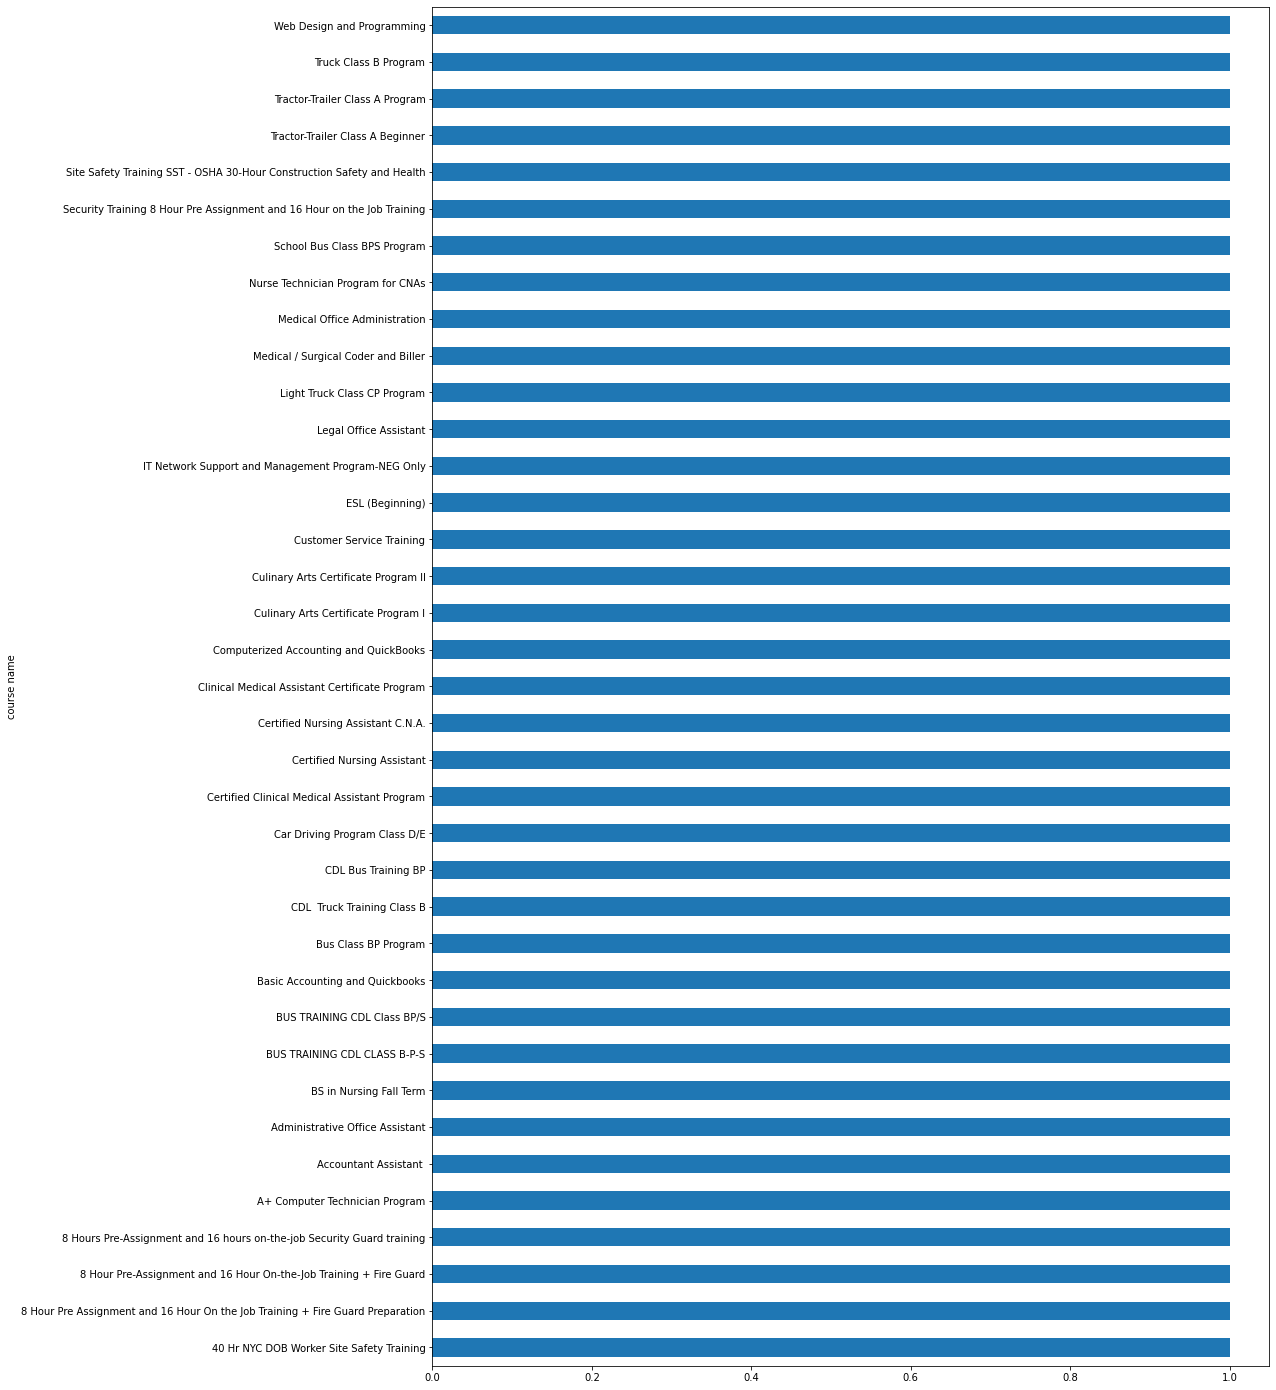

In [161]:
bronx_courses_= bronx_course.plot.barh(x ='Course',
                                      y='Count',

                                     )

### Although there isn't more than one class for these different courses, they all posseses, different industries and different sections and are not limited to gender or race. The industries are varied into technology, safety training, finacial services, and bus training. With the minimum  pay of the class being from None -500. And average class size being from 15-35 or no class size maximum. All on a rolling basis. 

In [162]:

prereq = resources[resources["Borough"] == "Bronx"].groupby("Prerequisites").size()


In [163]:
prereq

Prerequisites
18 Years or Older                                                                                                                                                                                                                                                  1
8 hour pre-assignment training course                                                                                                                                                                                                                              1
Adults 18 years old and up; must have high school diploma or GED; basic computer knowledge; entitled to work in the United States of America(proof required); commitment to obtain the IT Certifications; commitment to pusue a telecommunication career with I    1
Applicant must be 18 or older  must have SS card  NYS ID  and disposition papers if criminal background exists.                                                                                            

### Now analyzing the prerequisites that are existent the biggest prerequisites is being 18 and having a drivers lisces, while there are courses which you have to have No Prerequisites, but the largest prerequisites is the high school diploma or GED which for most is attained at the ages 17-18

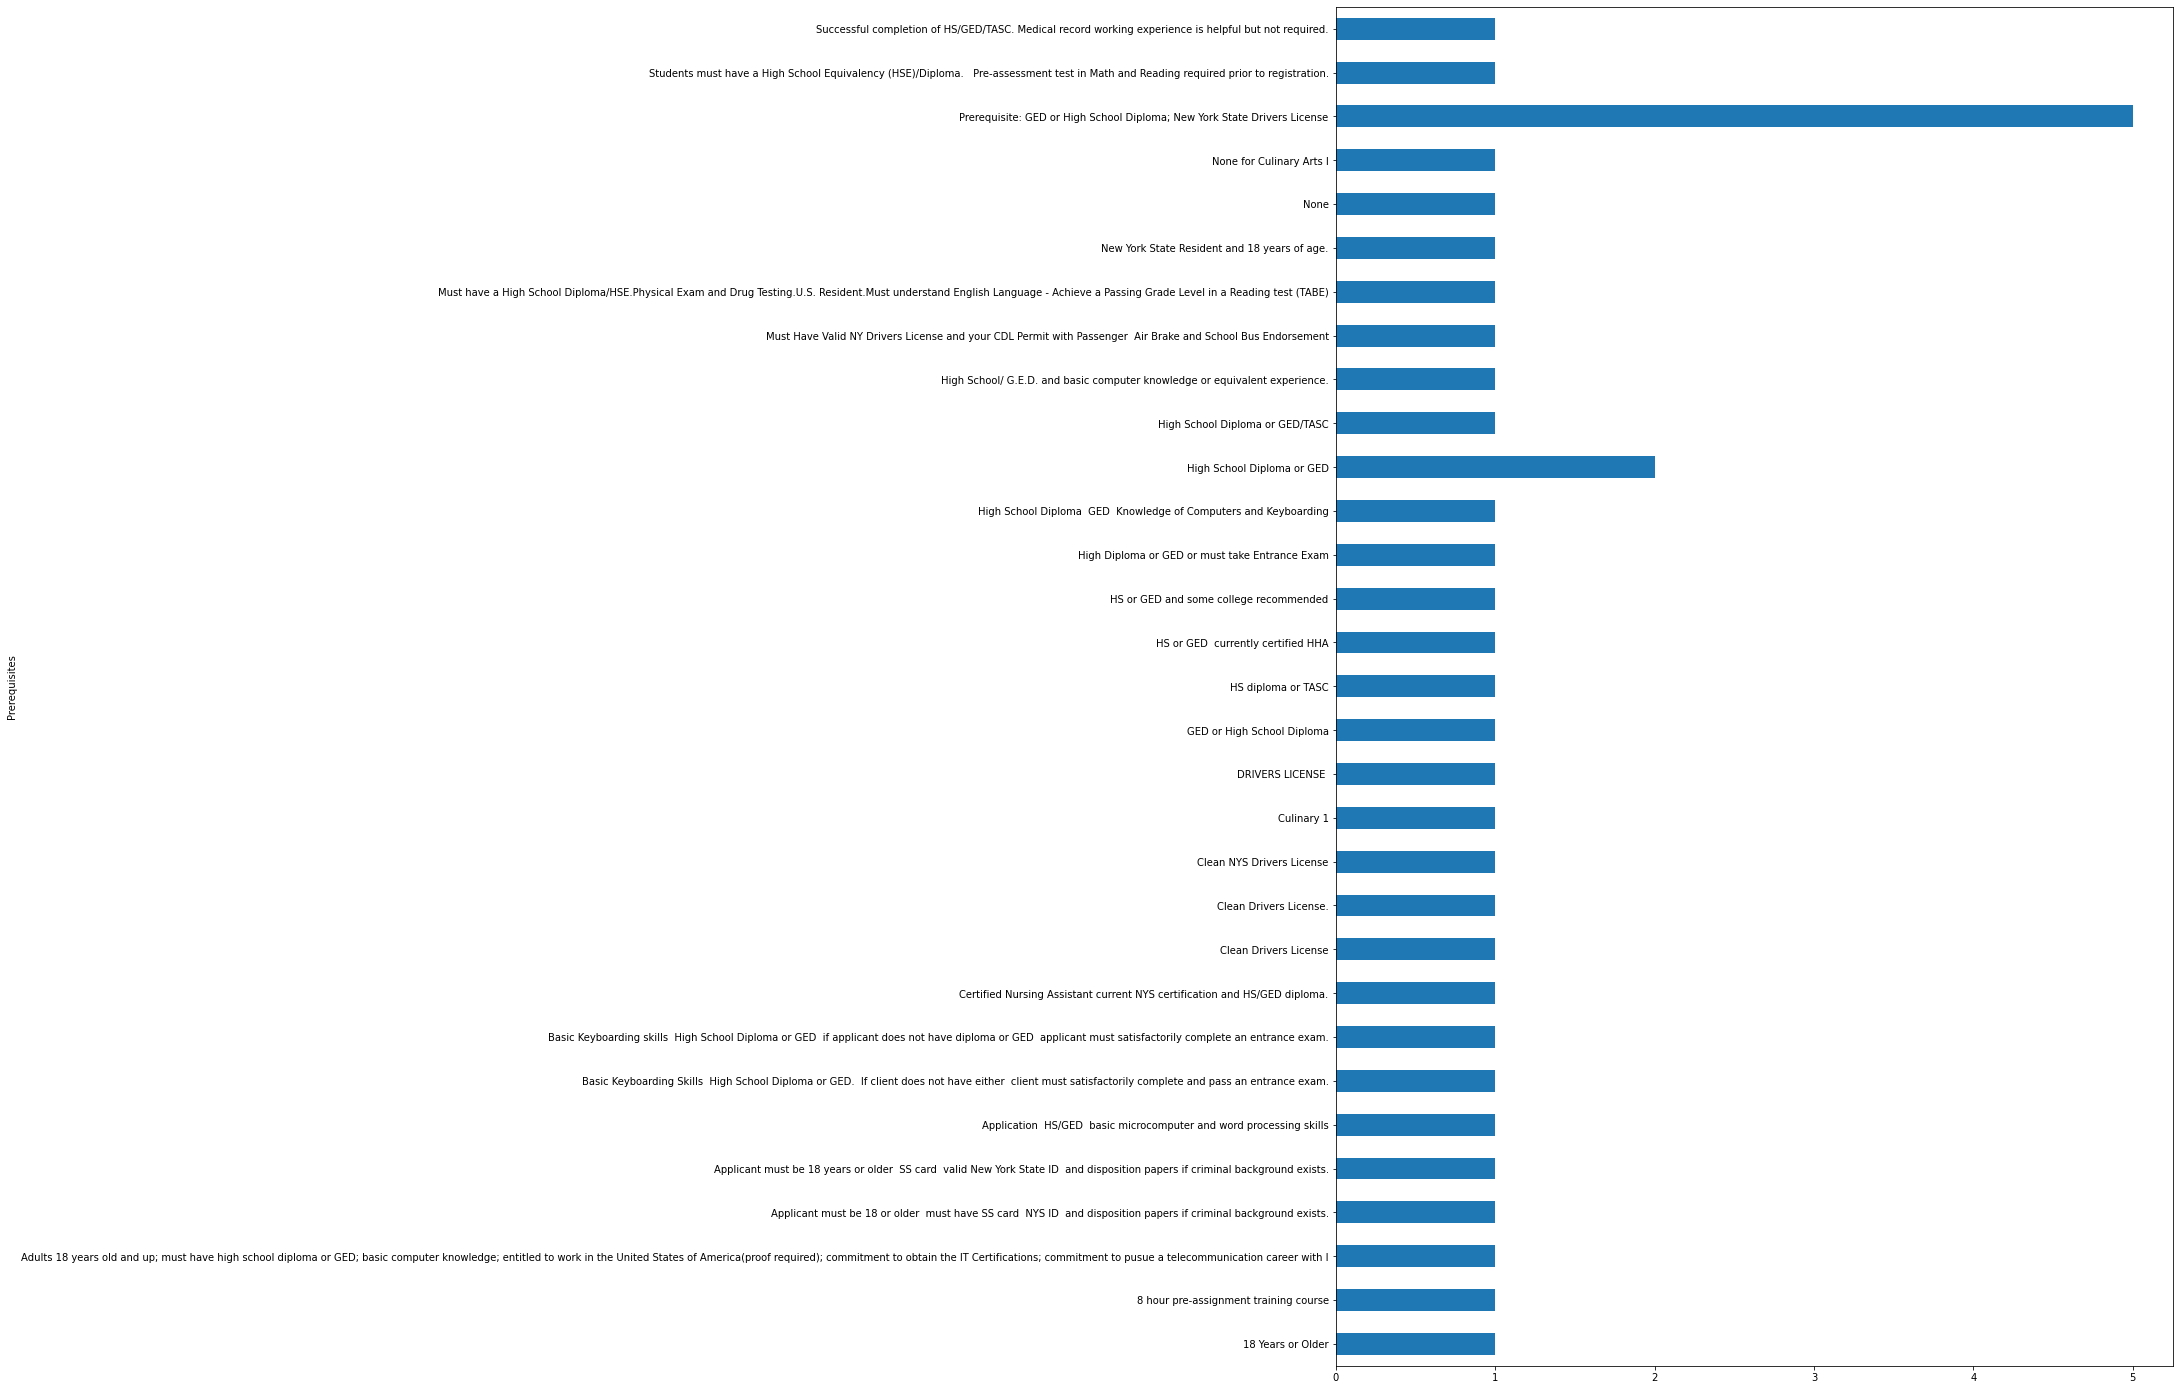

In [164]:
bronx_prereq_= prereq.plot.barh(x ='Count',
                                      y='Prequisites',

                                     )

In [165]:
brooklyn_course = resources[resources["Borough"] == "Brooklyn"].groupby("course name").size()

In [166]:
brooklyn_course

course name
122 - Medical Insurance and Billing                                                  1
47 Hours Armed Security Guard                                                        1
8 HOUR PRE-ASSIGNMENT  16 HOUR OJT & FIREGUARD PREP COURSE                           1
8 Hour Pre-Assignment and 16 Hour On-The-Job Security Guard Training & Fire Guard    1
8 Hours Pre Assignment and 16 Hour On the Job Training                               1
                                                                                    ..
Sprinkler Systems Maintenance                                                        1
Standpipe Systems Maintenance                                                        1
VB.NET                                                                               1
Writing About American Literature I                                                  1
certificate In Word Processing                                                       1
Length: 133, dtype: int64

In [167]:
bk_prereq = resources[resources["Borough"] == "Bronx"].groupby("Prerequisites").size()

In [168]:
bk_prereq

Prerequisites
18 Years or Older                                                                                                                                                                                                                                                  1
8 hour pre-assignment training course                                                                                                                                                                                                                              1
Adults 18 years old and up; must have high school diploma or GED; basic computer knowledge; entitled to work in the United States of America(proof required); commitment to obtain the IT Certifications; commitment to pusue a telecommunication career with I    1
Applicant must be 18 or older  must have SS card  NYS ID  and disposition papers if criminal background exists.                                                                                            

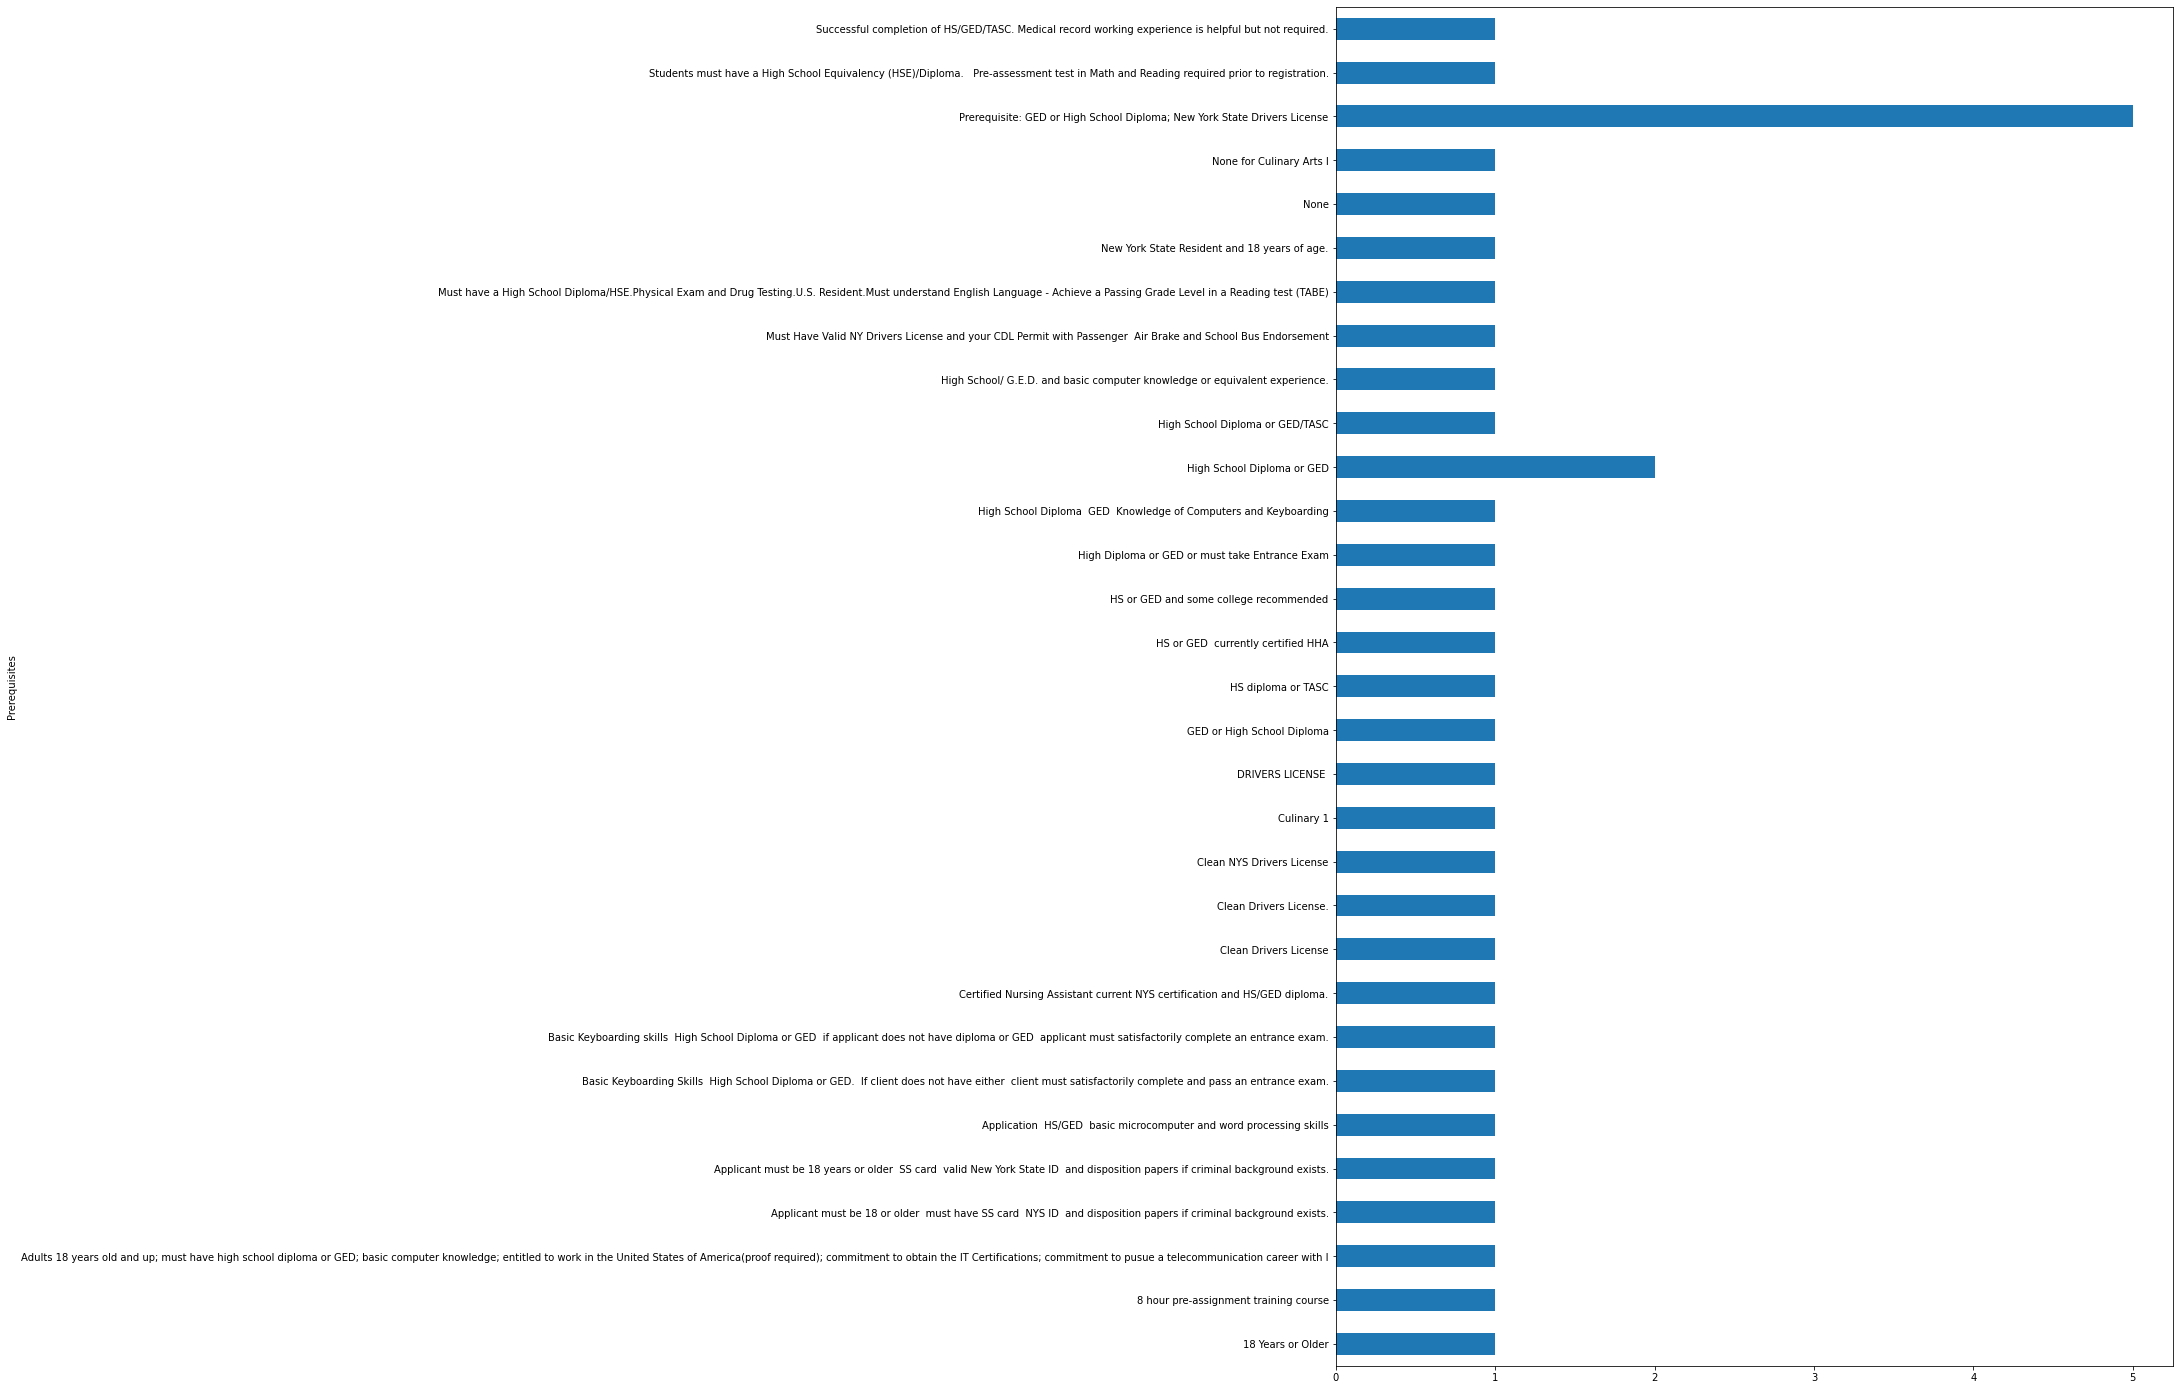

In [169]:
bk_prereq_= bk_prereq.plot.barh(x ='Count',
                                      y='Prequisites',

                                     )

In [170]:
 average_cost = resources['Cost Total'].mean()

In [171]:
average_cost

3677.0545977011493

### The average cost for all these classes will be a total of 3,677.

### We are able to view that this is the same for Brooklyn. 

### Overall the key takeaway is that all boroughs provide different training programs that can encourage in work training programs amongst different foster care system to align with NYC once a student has graduated to reduce the amount of homeless once in the system, or decrease the limitation for students to enter work training programs at the ages 16 to help them know what to go for college for and be college ready. 

## Conclsions Drawn  <a id='5'></a>

## How to Finance the Foster Care System and Educational System ?

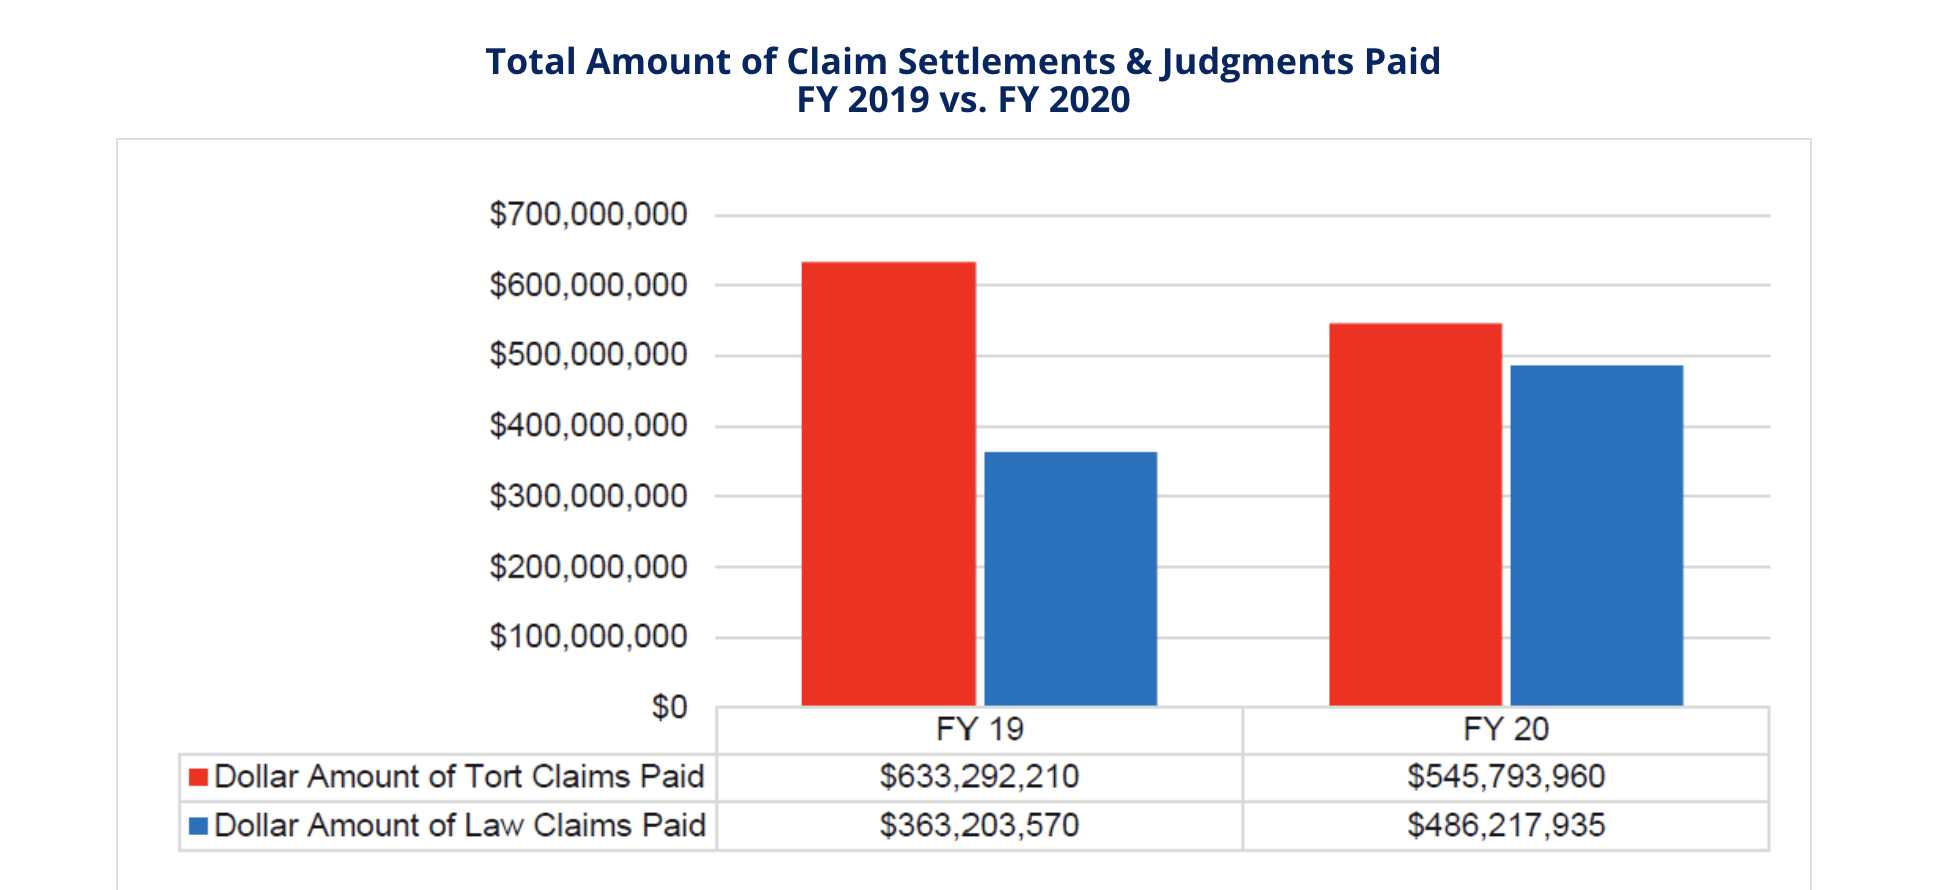

In [172]:
from IPython.display import Image
Image('judgements_paid.png')

#### In New York City Charter, the Comptroller is able to control the amount of power settled to adjust all claims in the favor against the City. The claims against the city are often given by police brutality,medical malpractices, civil right claims in which doctors or police department members face only suspension. However, as taxpayers this is taking away income that could be redistrubuted bakc into the city and overall improve the economy with redistrubiting people back into the working system.  

#### While claims did decrease from 2019-2020, there is still a total of 545,793,960 that was paid in Tort Claims being that the average for all the in-class trainings are 3,677 we can help cover for more students that are in the foster care system rather than re-distrubuting money as tax payers into the Tort Claims. 

## Conclusion:  
    Overall our hypothesis was correct New York does have a high correlation of abuse and neglect in the foster care system therefore impacting the high school system. As those in the foster care system, get older, more are experiencing less educational contunity, and being discouraged by the system, By applying methods like New Jersey such as redistrubuting finances into social services, and compensation for work training programs more foster care students can achieve success beyond post-secondary, and feel supported. 